<a href="https://colab.research.google.com/github/idolou/Python-Vieo-Analysis/blob/main/Python_Video_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video Analysis

##Imported libraries:

*   files - for uploading the video file
*   moviepy.editor - to show the video
*   cv2 - for video analysis
*   numpy for calculations

###Notice you run this command to install required libraries!
```python
!apt-get install tesseract-ocr
!pip install pytesseract






In [56]:
from google.colab import files
import moviepy.editor
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pytesseract

#Upload video file
uploaded_file = files.upload()

#Extract the file name (for the vido path)
file_name = next(iter(uploaded_file))

# Define video path
video_path = f"/content/{file_name}"

Saving rgb.mp4 to rgb (1).mp4


**Display The Video**

In [ ]:
#Show toh video on notebook
moviepy.editor.ipython_display(video_path, width=600, filetype='video')

**Get video parameters**

In [58]:
# Load video capture
capture = cv2.VideoCapture(video_path)

# Get frame count
frames_count = capture.get(cv2.CAP_PROP_FRAME_COUNT)
# Get video height
height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
# Get video width
width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
# Get fps - frames per second
fps = capture.get(cv2.CAP_PROP_FPS)

# Release capture
capture.release()

print(f'Height: {height}, Width: {width}, Number Of Frames: {frames_count}')
print(f'FPS: {fps:0.2f}')

Height: 1080.0, Width: 1920.0, Number Of Frames: 498.0
FPS: 25.00


**Read video file and return video capture object.**

In [59]:
# Help functions
def read_video(video_path):
    """
    Read video file and return video capture object.
    Parameters:
    video_path (str): Path to the video file.
    """
    capture = cv2.VideoCapture(video_path)
    if not capture.isOpened():
        raise ValueError("Error: Could not open video file.")
    return capture

**Functions to get brightest, darkest and color dominance frames**

In [60]:
def brightest_frame(video_path):
    """
    Finds the brightest frame in a video by calculating the average brightness of each frame after converting it to grayscale.

    Args:
    - video_path (str): The path to the video file to be analyzed.

    Returns:
    - tuple: A tuple containing information about the brightest frame in the video.
             The tuple structure is as follows:
             (brightest_frame_index, brightest_brightness_value, brightest_frame_image)
             where:
             - brightest_frame_index (int): The index of the brightest frame in the video.
             - brightest_brightness_value (float): The average brightness value of the brightest frame.
             - brightest_frame_image (numpy.ndarray): The image array of the brightest frame.
    """

    brightest_frame_idx = None
    brightest_value = 0
    brightest_img = None

    # Load video capture
    capture = read_video(video_path)

    # Iterate over the frames
    while True:
        # Read a frame
        ret, img = capture.read()

        # Break loop if no more frames left
        if not ret:
            break

        # Convert image to grayscale color
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate average brightness
        avg_brightness = np.mean(grayscale_img)

        # Get frame index
        frame_idx = capture.get(cv2.CAP_PROP_POS_FRAMES) - 1

        # Update brightest frame
        if avg_brightness > brightest_value:
            brightest_frame_idx = frame_idx
            brightest_value = avg_brightness
            brightest_img = img

    # Release capture
    capture.release()

    return brightest_frame_idx, brightest_value, brightest_img




def darkest_frame(video_path):
    """
    Finds the darkest frame in a video by calculating the average brightness of each frame after converting it to grayscale.

    Args:
    - video_path (str): The path to the video file to be analyzed.

    Returns:
    - tuple: A tuple containing information about the darkest frame in the video.
             The tuple structure is as follows:
             (darkest_frame_index, darkest_brightness_value, darkest_frame_image)
             where:
             - darkest_frame_index (int): The index of the darkest frame in the video.
             - darkest_brightness_value (float): The average brightness value of the darkest frame.
             - darkest_frame_image (numpy.ndarray): The image array of the darkest frame.
    """
    darkest_frame_idx = None
    darkest_value = float('inf')
    darkest_img = None

    # Load video capture
    capture = read_video(video_path)

    # Iterate over the frames
    while True:
        # Read a frame
        ret, img = capture.read()

        # Break loop if no more frames left
        if not ret:
            break

        # Convert image to grayscale color
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate average brightness
        avg_brightness = np.mean(grayscale_img)

        # Get frame index
        frame_idx = capture.get(cv2.CAP_PROP_POS_FRAMES) - 1

        # Update darkest frame
        if avg_brightness < darkest_value:
            darkest_frame_idx = frame_idx
            darkest_value = avg_brightness
            darkest_img = img

    # Release capture
    capture.release()

    return darkest_frame_idx, darkest_value, darkest_img



def color_dominance_analysis(video_path):
    """
    Analyzes the color dominance in a video by calculating the average value of each color channel (Red, Green, Blue)
    across all frames and identifying the frame with the highest average value for each color channel.

    Args:
    - video_path (str): The path to the video file to be analyzed.

    Returns:
    - dict: A dictionary containing information about the frame with the highest average value for each color channel.
            The dictionary structure is as follows:
            {
                "red": (frame_index, max_red_value, frame_image),
                "green": (frame_index, max_green_value, frame_image),
                "blue": (frame_index, max_blue_value, frame_image)
            }
            where:
            - frame_index (int): The index of the frame with the highest average value for the corresponding color channel.
            - max_red_value (float): The highest average value of the Red channel among all frames.
            - max_green_value (float): The highest average value of the Green channel among all frames.
            - max_blue_value (float): The highest average value of the Blue channel among all frames.
            - frame_image (numpy.ndarray): The image array of the frame with the highest average value for the corresponding color channel.
    """
    import cv2
    import numpy as np


    # Load video capture
    capture = read_video(video_path)


    max_red_idx = max_green_idx = max_blue_idx = None
    max_red_img = max_green_img = max_blue_img = None
    max_red_value = max_green_value = max_blue_value = -1

    # Iterate through the frames
    while True:
        ret, img = capture.read()
        if not ret:
            break

        # Get the frame count
        frame_count = capture.get(cv2.CAP_PROP_POS_FRAMES) - 1

        # Calculate average value of each color channel
        avg_value = np.mean(img, axis=(0, 1))

        # Check for red
        if avg_value[2] > max_red_value and avg_value[2] > avg_value[0] and avg_value[2] > avg_value[1]:
            max_red_value = avg_value[2]
            max_red_idx = frame_count
            max_red_img = img

        # Check for green
        if avg_value[1] > max_green_value and avg_value[1] > avg_value[0] and avg_value[1] > avg_value[2]:
            max_green_value = avg_value[1]
            max_green_idx = frame_count
            max_green_img = img

        # Check for blue
        if avg_value[0] > max_blue_value and avg_value[0] > avg_value[1] and avg_value[0] > avg_value[2]:
            max_blue_value = avg_value[0]
            max_blue_idx = frame_count
            max_blue_img = img

    capture.release()

    return {
        "red": (max_red_idx, max_red_value, max_red_img),
        "green": (max_green_idx, max_green_value, max_green_img),
        "blue": (max_blue_idx, max_blue_value, max_blue_img)
    }




def display_images(brightest_img, darkest_img, red_img, green_img, blue_img):
    """
    Display images in a grid layout for bright, dark, and RGB frames.

    Parameters:
    brightest_img (numpy.ndarray): Image data for the brightest frame.
    darkest_img (numpy.ndarray): Image data for the darkest frame.
    red_img (numpy.ndarray): Image data for the red dominant frame.
    green_img (numpy.ndarray): Image data for the green dominant frame.
    blue_img (numpy.ndarray): Image data for the blue dominant frame.
    """
    plt.figure(figsize=(15, 10))

    # Plot Brightest Frame
    plt.subplot(2, 3, 1)
    if brightest_img is not None:
        plt.imshow(brightest_img)
        plt.title("Brightest Frame")
    else:
        print("Error: Brightest frame is empty.")

    # Plot Darkest Frame
    plt.subplot(2, 3, 2)
    if darkest_img is not None:
        plt.imshow(darkest_img)
        plt.title("Darkest Frame")
    else:
        print("Error: Darkest frame is empty.")

    # Plot Red Dominant Frame
    plt.subplot(2, 3, 3)
    if red_img is not None:
        plt.imshow(red_img)
        plt.title("Red Dominant Frame")
    else:
        print("Error: Red dominant frame is empty.")

    # Plot Green Dominant Frame
    plt.subplot(2, 3, 4)
    if green_img is not None:
        plt.imshow(green_img)
        plt.title("Green Dominant Frame")
    else:
        print("Error: Green dominant frame is empty.")

    # Plot Blue Dominant Frame
    plt.subplot(2, 3, 5)
    if blue_img is not None:
        plt.imshow(blue_img)
        plt.title("Blue Dominant Frame")
    else:
        print("Error: Blue dominant frame is empty.")

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

In [61]:
# Get the brightest frame in the video
brightest_frame_idx, brightest_value, brightest_img = brightest_frame(video_path)

# Get the darkest frame in the video
darkest_frame_idx, darkest_value, darkest_img = darkest_frame(video_path)

# Analyze color dominance in the video
color_analysis_dict = color_dominance_analysis(video_path)

# Print results
print(f"Brightest frame index: {brightest_frame_idx} with {brightest_value} brightness value\n")
print(f"Darkest frame index: {darkest_frame_idx} with {darkest_value} brightness value\n")

# Print color dominance analysis results
for color, (frame_index, value, img) in color_analysis_dict.items():
    print(f"Frame with most dominant {color}: {frame_index} (average value of {color}: {value})\n")


Brightest frame index: 183.0 with 125.0 brightness value

Darkest frame index: 157.0 with 0.0 brightness value

Frame with most dominant red: 132.0 (average value of red: 254.0)

Frame with most dominant green: 183.0 (average value of green: 213.0)

Frame with most dominant blue: 433.0 (average value of blue: 253.99824074074073)



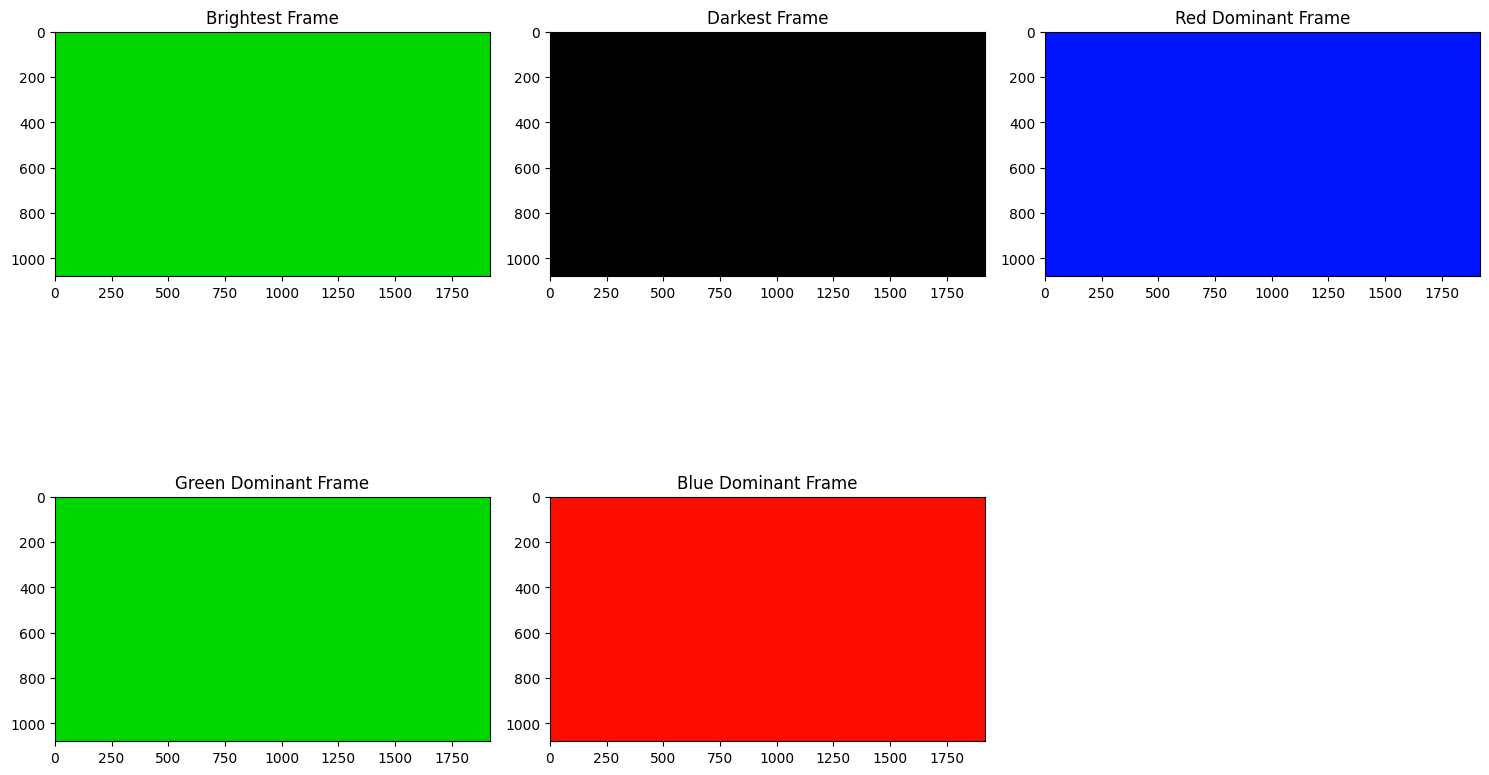

In [62]:
# Display images
display_images(brightest_img,    # Display the brightest frame image
               darkest_img,      # Display the darkest frame image
               color_analysis_dict["red"][2],    # Display the frame with the most dominant red color
               color_analysis_dict["green"][2],  # Display the frame with the most dominant green color
               color_analysis_dict["blue"][2])   # Display the frame with the most dominant blue color


**Function to get all frames with significant movement. **


*Use this script to upload new video, for example video with faces in it:*
```python
uploaded_file = files.upload()
file_name = next(iter(uploaded_file))
video_path = f"/content/{file_name}"
```

In [63]:
#Upload video file
uploaded_file = files.upload()

#Extract the file name (for the vido path)
file_name = next(iter(uploaded_file))

# Define video path
video_path = f"/content/{file_name}"

Saving Junction (Advanced Drive) [gtknA7PRAyw].mkv to Junction (Advanced Drive) [gtknA7PRAyw].mkv


In [64]:
def detect_movement(video_path, threshold=40, min_pixels_changed=180000):
    """
    Detects significant movement in a video by comparing consecutive frames.

    Args:
    - video_path (str): The path to the video file.
    - threshold (int): The threshold value for detecting movement. Default is 30.
    - min_pixels_changed (int): The minimum number of pixels changed to consider it significant movement. Default is 160000.

    Returns:
    - list: A list of tuples containing frame indices and corresponding frames with significant movement.
            Each tuple has the structure (frame_index, frame_image).
    """
    # Read video
    capture = read_video(video_path)

    # Init variables
    prev_frame = None
    significant_movement_frames = []

    while True:
        ret, frame = capture.read()
        if not ret:
            break

        # Convert frame to grayscale
        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Get the frame index
        frame_idx = capture.get(cv2.CAP_PROP_POS_FRAMES) - 1

        if prev_frame is not None:

            # Calculate the difference between current frame and previous frame
            difference = cv2.absdiff(prev_frame, grayscale_frame)

            # Apply threshold to the difference
            _, th_diff = cv2.threshold(difference, threshold, 255, cv2.THRESH_BINARY)

            # Count the number of pixels that changed
            pixels_changed = np.count_nonzero(th_diff)

            # If enough pixels changed, add frame to significant_movement_frames
            if pixels_changed > min_pixels_changed:
                significant_movement_frames.append((frame_idx, frame))

        prev_frame = grayscale_frame

    capture.release()

    return significant_movement_frames



def face_detection(video_path):
    """
    Detects faces in each frame of a video.

    Args:
    - video_path (str): The path to the video file.

    Returns:
    - list: A list of tuples containing the number of faces detected and corresponding frames.
            Each tuple has the structure (num_faces, frame_image).
    """
    # Read video
    capture = read_video(video_path)

    # Init variables
    faces_in_frame = []

    # Load Haar cascade classifier for face detection
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


    while True:
        ret, frame = capture.read()
        if not ret:
            break

        # Convert frame to grayscale
        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Get the frame index
        frame_idx = capture.get(cv2.CAP_PROP_POS_FRAMES) - 1

        # Detect faces in the frame
        faces = face_classifier.detectMultiScale(grayscale_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        if 1 < len(faces) < 5:
            # Append the number of faces and the frame to the list
            faces_in_frame.append((frame_idx, len(faces), frame))

    # Release the video capture object
    capture.release()

    return faces_in_frame





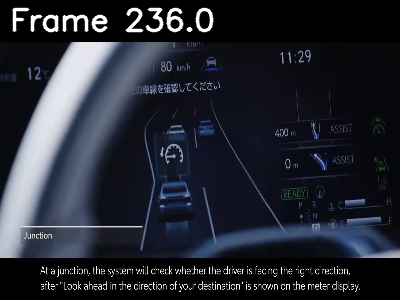

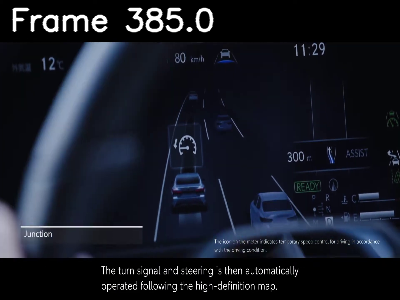

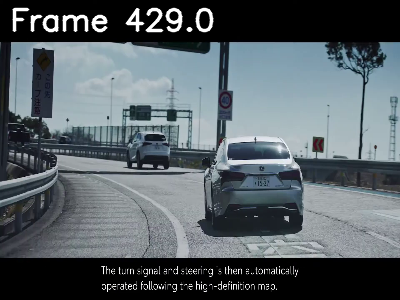

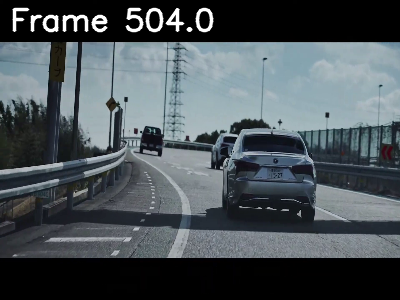

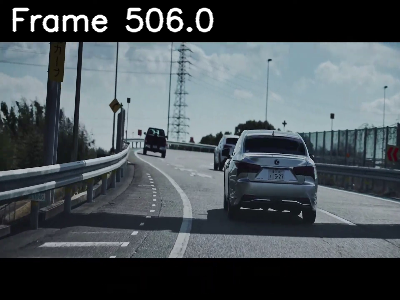

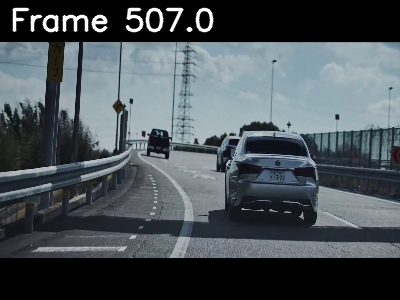

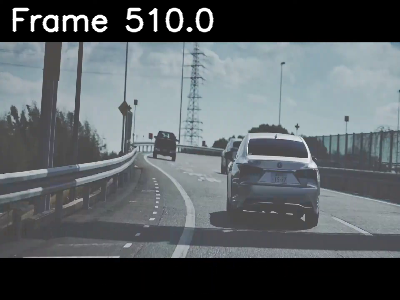

In [72]:
# Get the frames of motion
motion_frames = detect_movement(video_path)

# Define the desired width and height for the smaller frames
new_width = 400
new_height = 300

for frame in motion_frames:
    # Resize the frame
    resized_frame = cv2.resize(frame[1], (new_width, new_height))
    # Add title to the frame
    title = f"Frame {frame[0]}"
    cv2.putText(resized_frame, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    # Show the resized frame with title
    cv2_imshow(resized_frame)


**Function to detect faces**


*Use this script to upload new video, for example video with faces in it:*
```python
uploaded_file = files.upload()
file_name = next(iter(uploaded_file))
video_path = f"/content/{file_name}"
```

In [67]:
#Upload video file
uploaded_file = files.upload()

#Extract the file name (for the vido path)
file_name = next(iter(uploaded_file))

# Define video path
video_path = f"/content/{file_name}"

Saving MAH08951.MP4 to MAH08951 (1).MP4


In [ ]:
# Detect faces and get frames
faces_frames = face_detection(video_path)

# Define the desired width and height for the smaller frames
new_width = 400
new_height = 300

for idx, num_faces, frame in faces_frames:

    # Add title to the frame
    title = f"Frame {idx+1}: {num_faces} faces"
    cv2.putText(frame, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

    # Draw green rectangles around detected faces
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) containing the face
        face_roi = frame[y:y+h, x:x+w]
        # Apply Gaussian blur to the ROI
        blurred_face = cv2.GaussianBlur(face_roi, (25, 25), 0)
        # Replace the original face with the blurred face
        frame[y:y+h, x:x+w] = blurred_face
        #draw rectangle around the faces
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the resized frame with title and detected faces
    cv2_imshow(frame)

*Use this script to upload new video, for example video with text in it:*
```python
uploaded_file = files.upload()
file_name = next(iter(uploaded_file))
video_path = f"/content/{file_name}"
```

In [69]:
#Upload video file
uploaded_file = files.upload()

#Extract the file name (for the vido path)
file_name = next(iter(uploaded_file))

# Define video path
video_path = f"/content/{file_name}"

Saving 201292 (540p).mp4 to 201292 (540p) (1).mp4


**Function to detect text in video frames**

In [70]:
# Path to Tesseract OCR executable (change this according to your system)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def text_recognition_from_video(video_path):
    """
    Performs text recognition on each frame of a video using OCR (Optical Character Recognition).

    Args:
    - video_path (str): The path to the video file to be analyzed.
    """
    # Start capturing video from the video file
    cap = cv2.VideoCapture(video_path)

    while True:
        # Read a frame from the video capture
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to detect and extract text from the frame
        text = pytesseract.image_to_string(gray)

        # If the text is empty or contains only whitespace characters, skip to the next frame
        if not text.strip():
            continue

        # Draw the detected text on the frame
        cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Display the frame
        cv2_imshow(frame)

        # Break the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture and close all windows
    cap.release()
    cv2.destroyAllWindows()



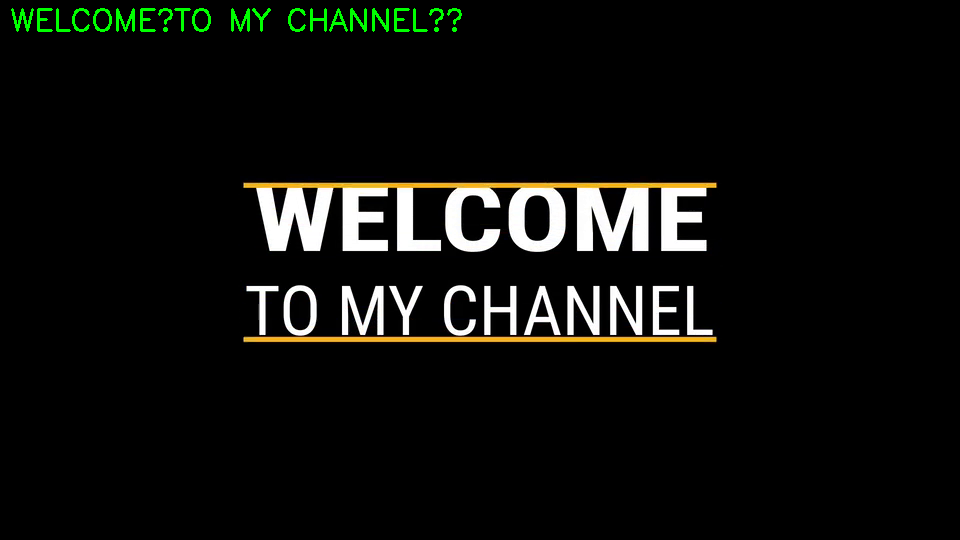

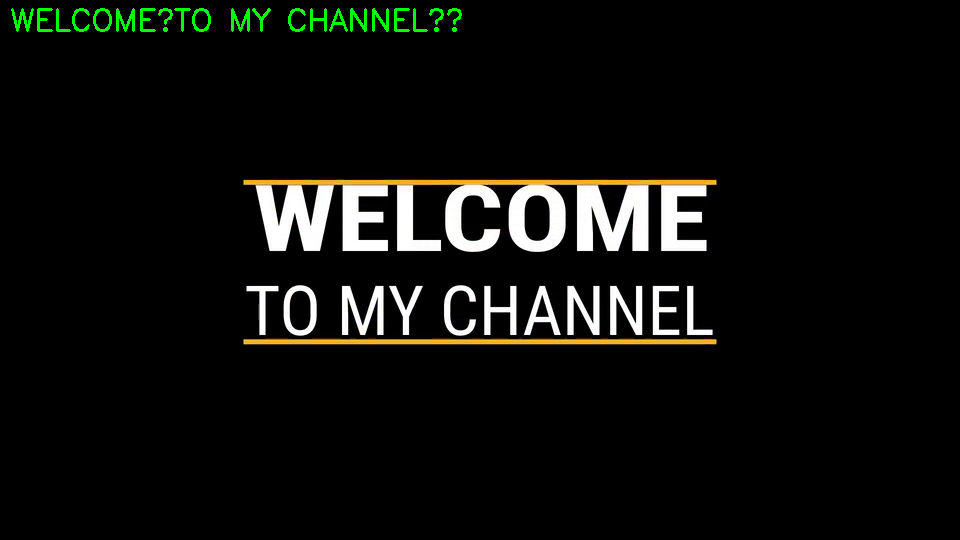

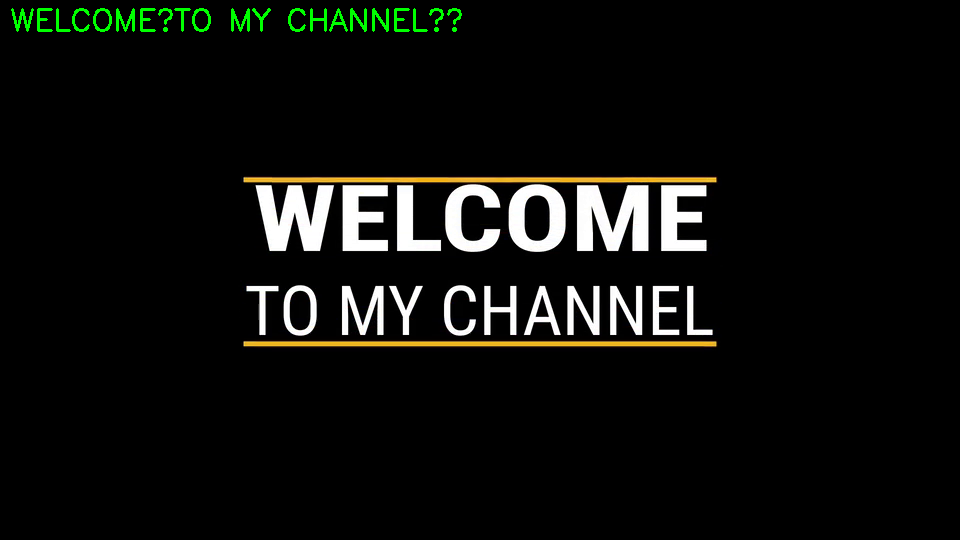

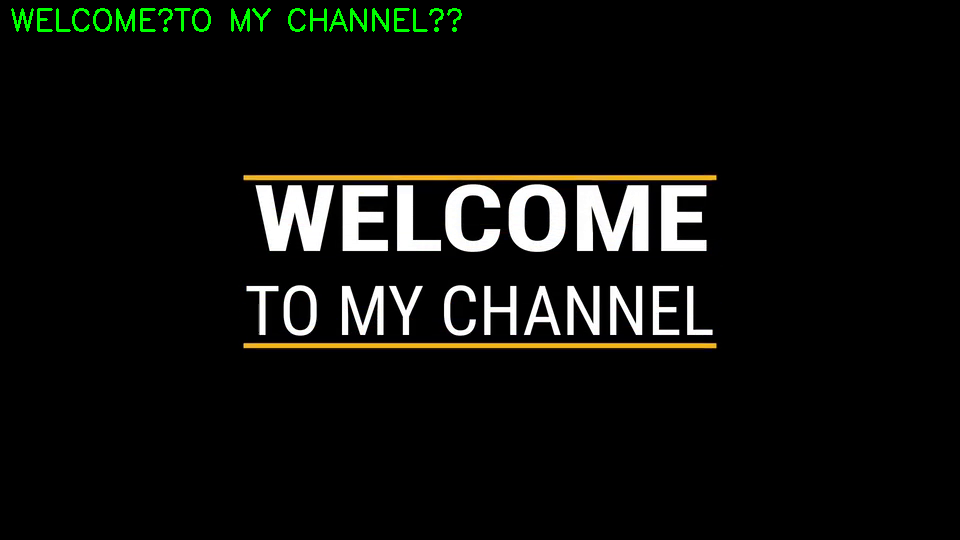

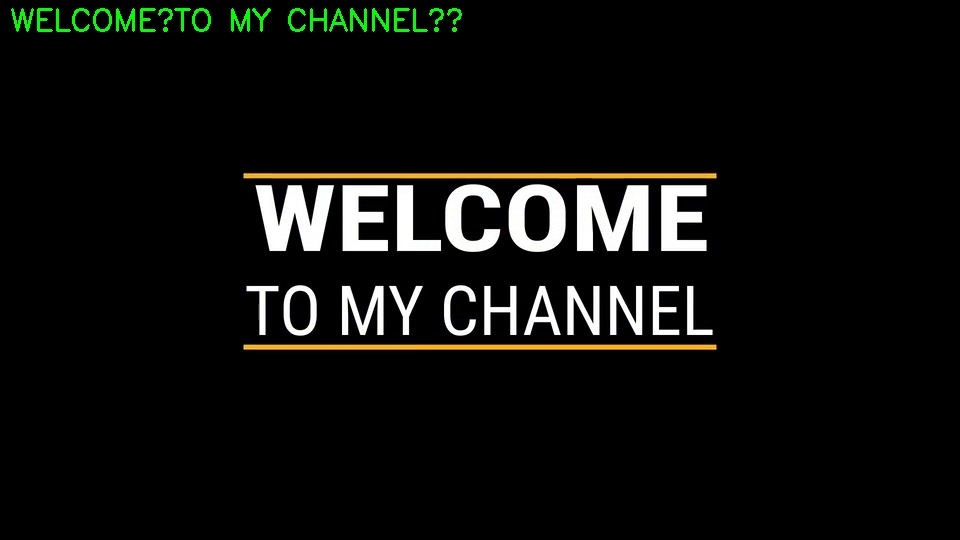

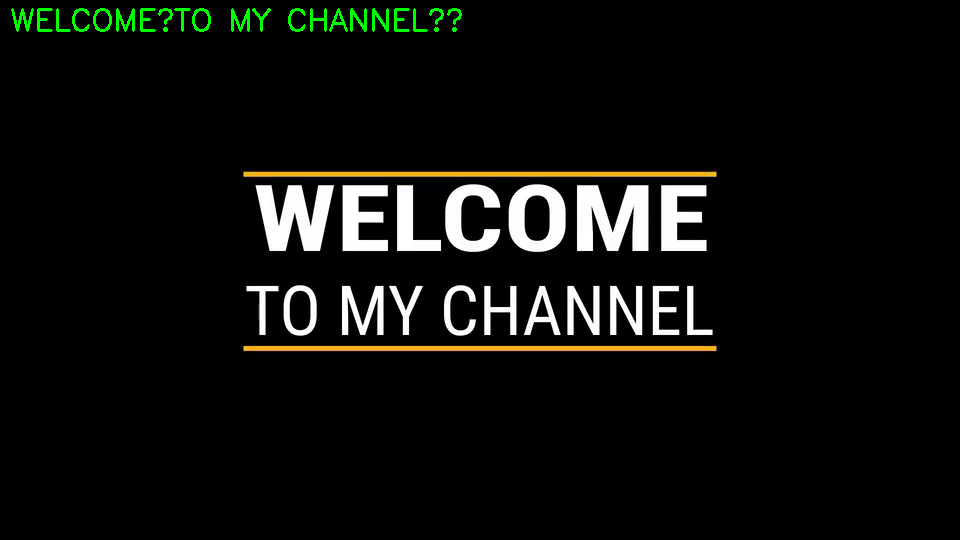

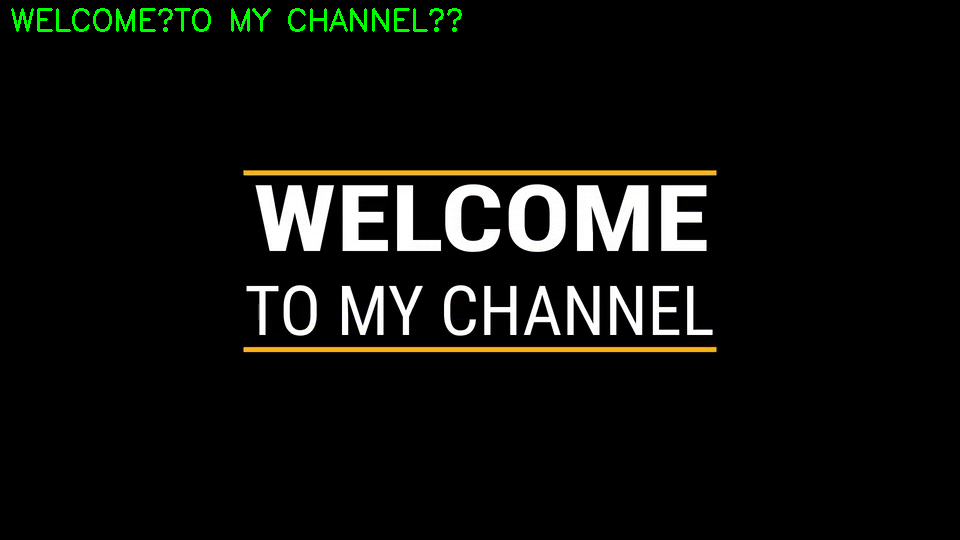

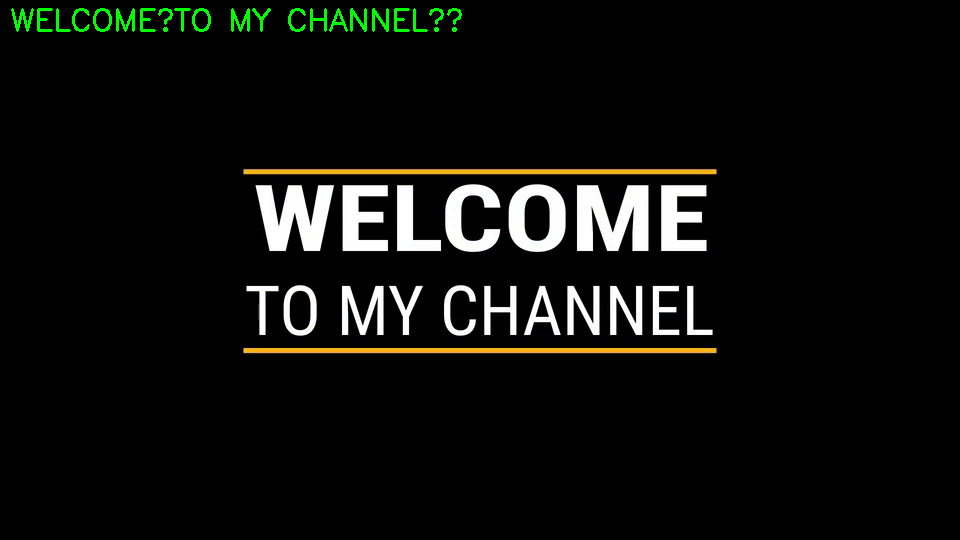

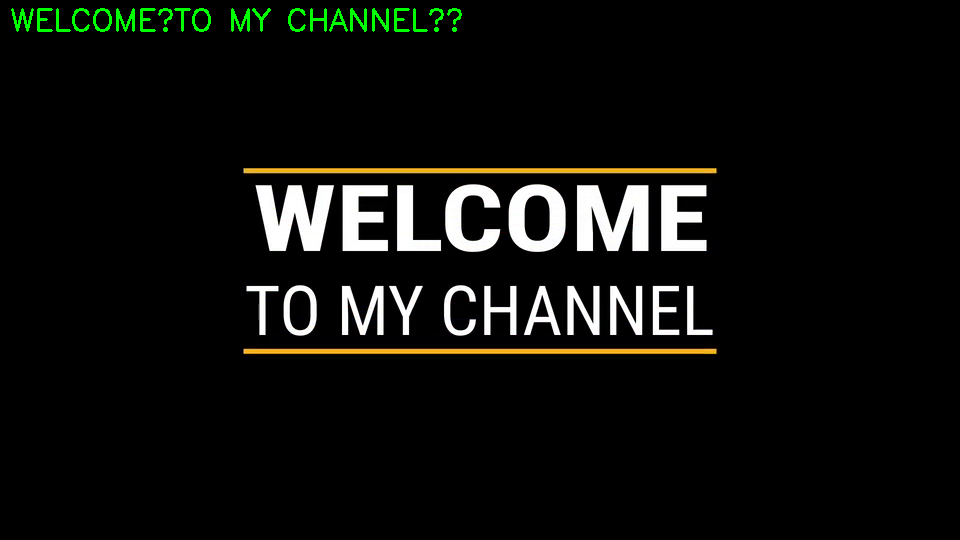

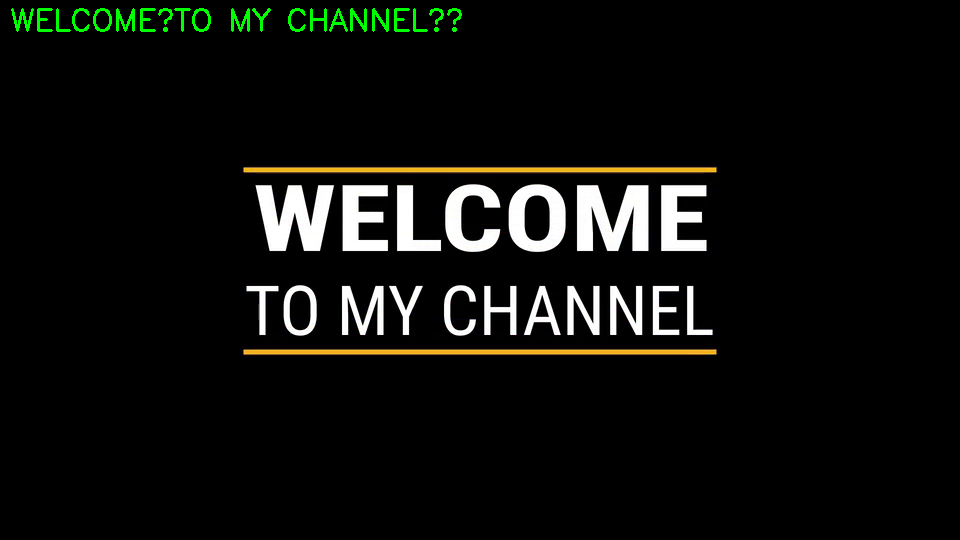

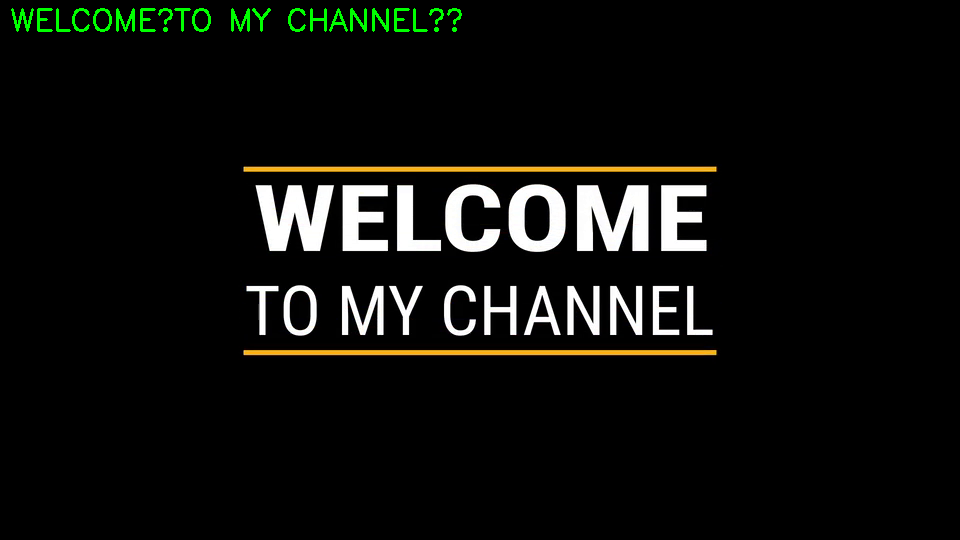

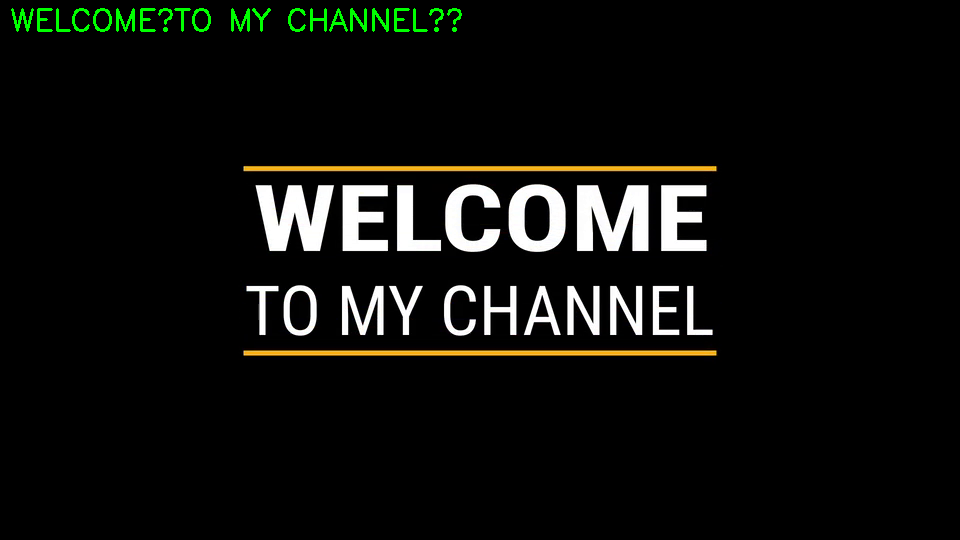

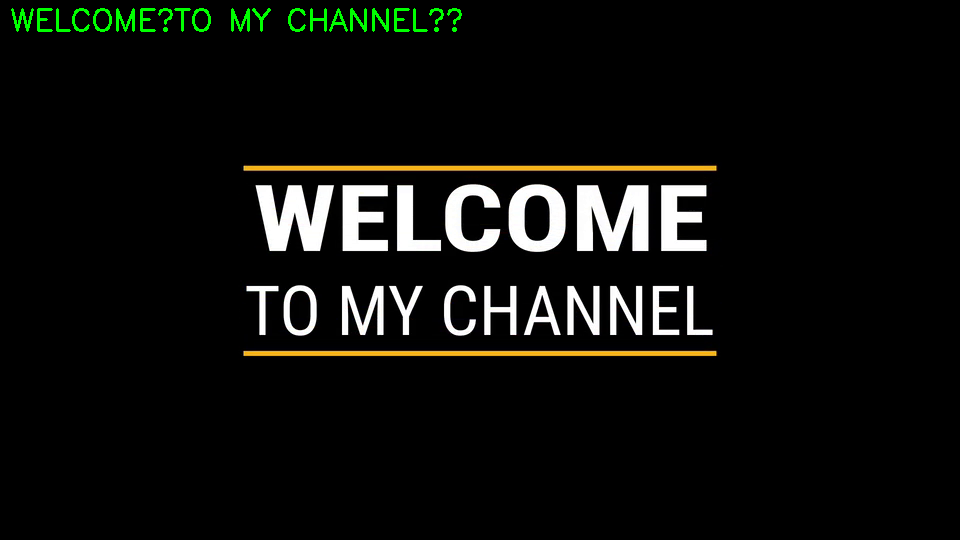

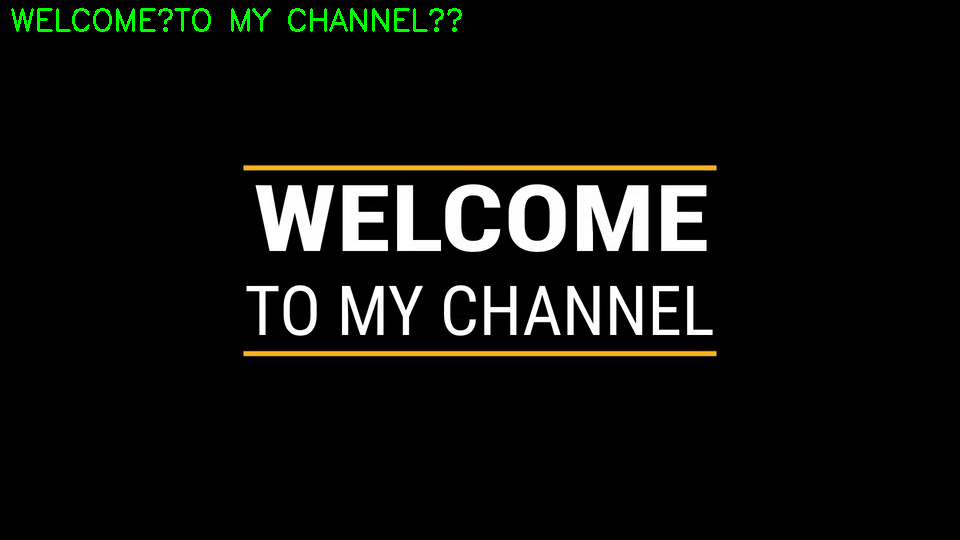

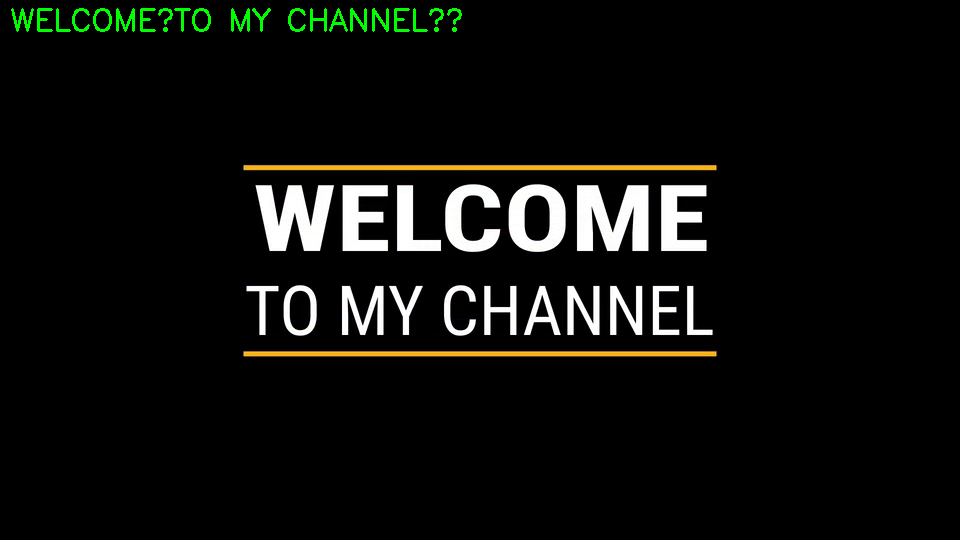

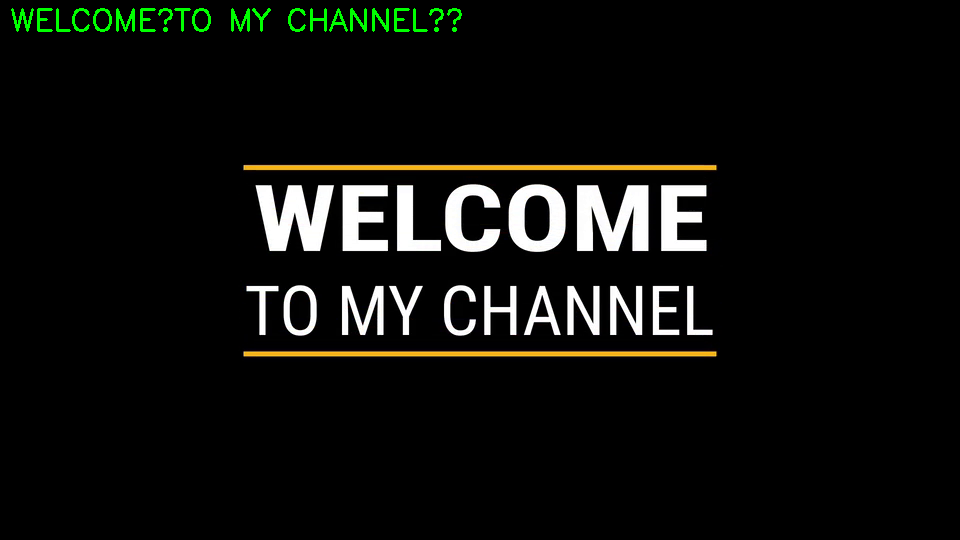

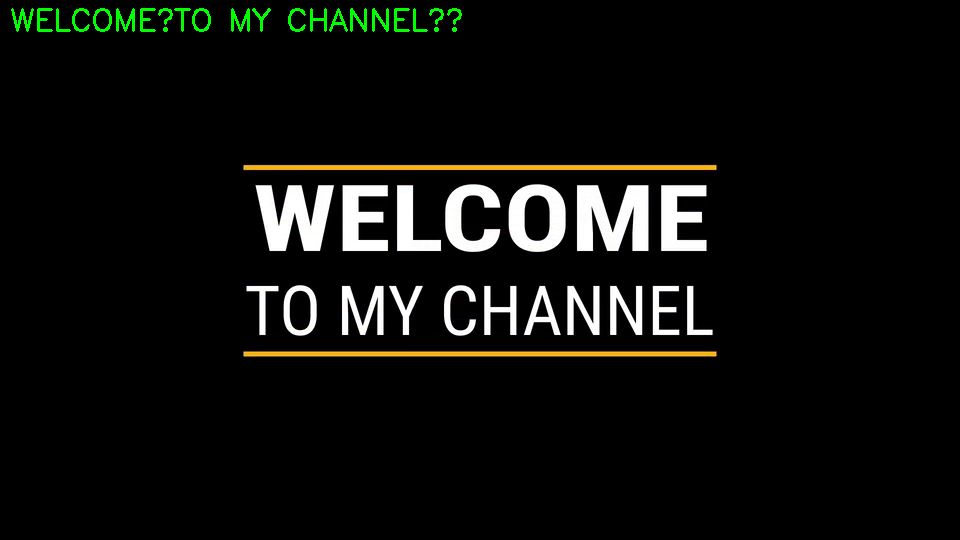

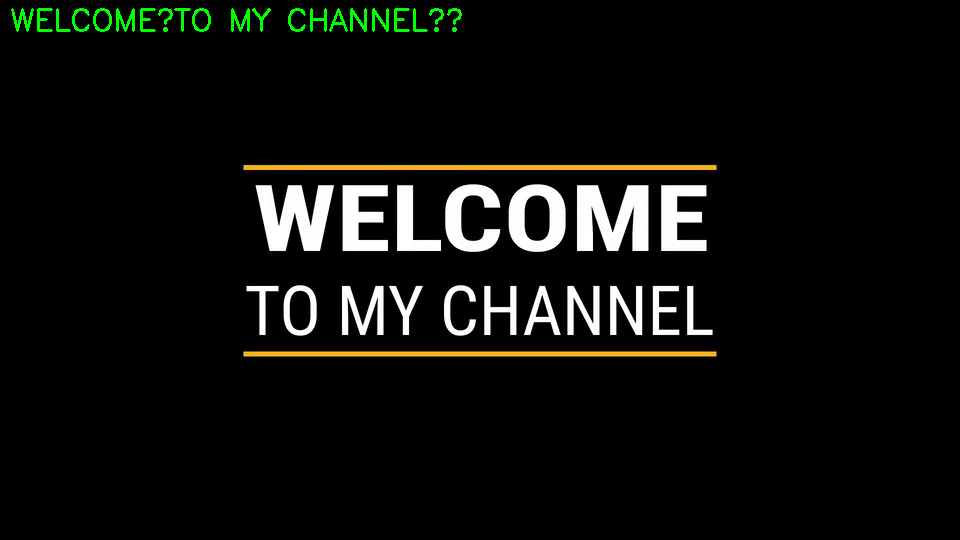

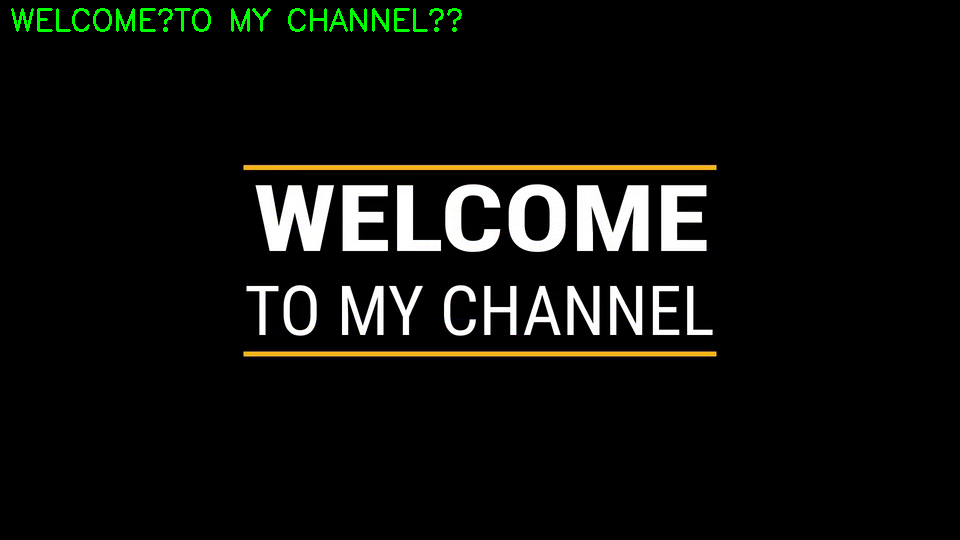

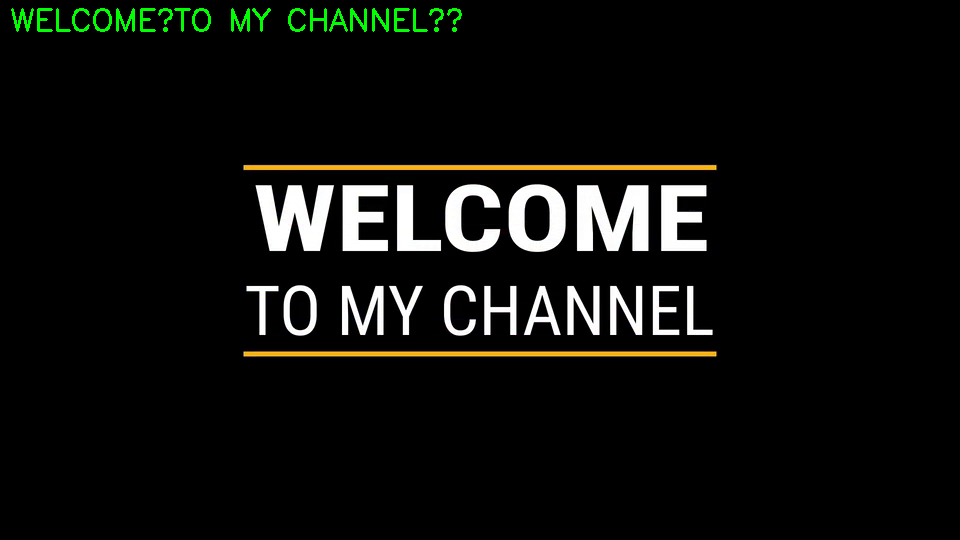

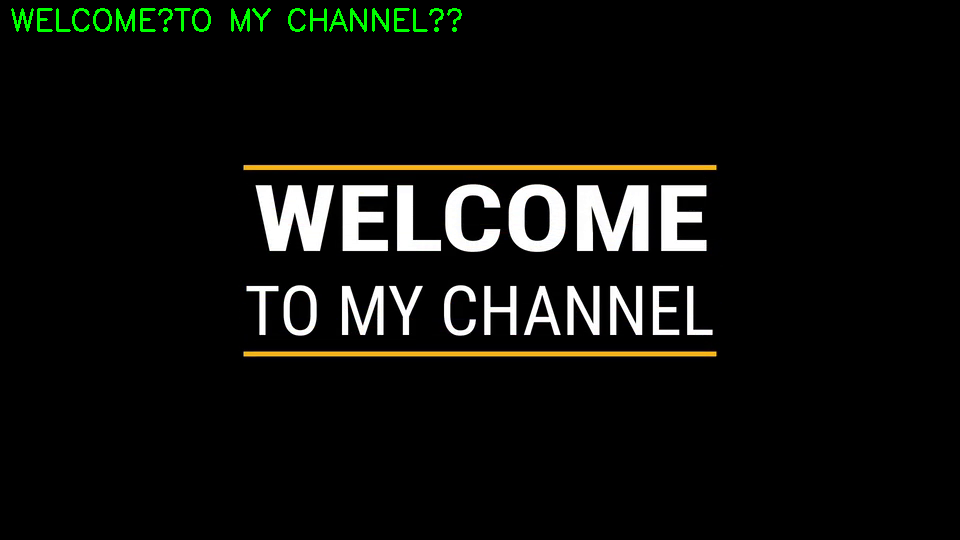

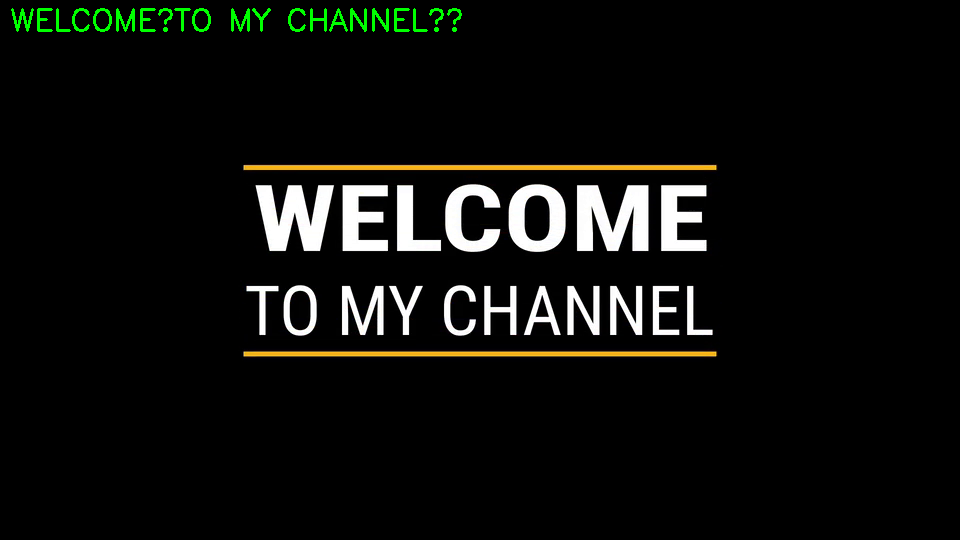

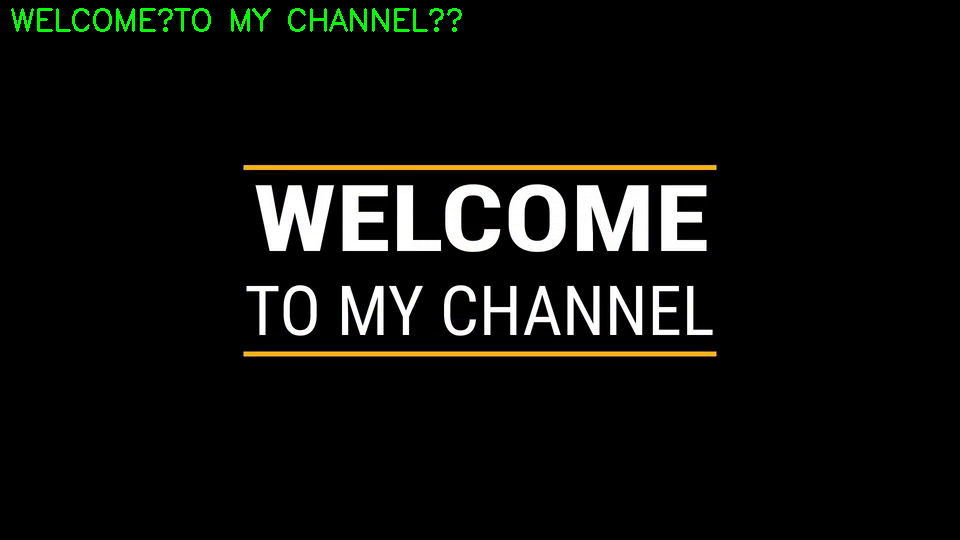

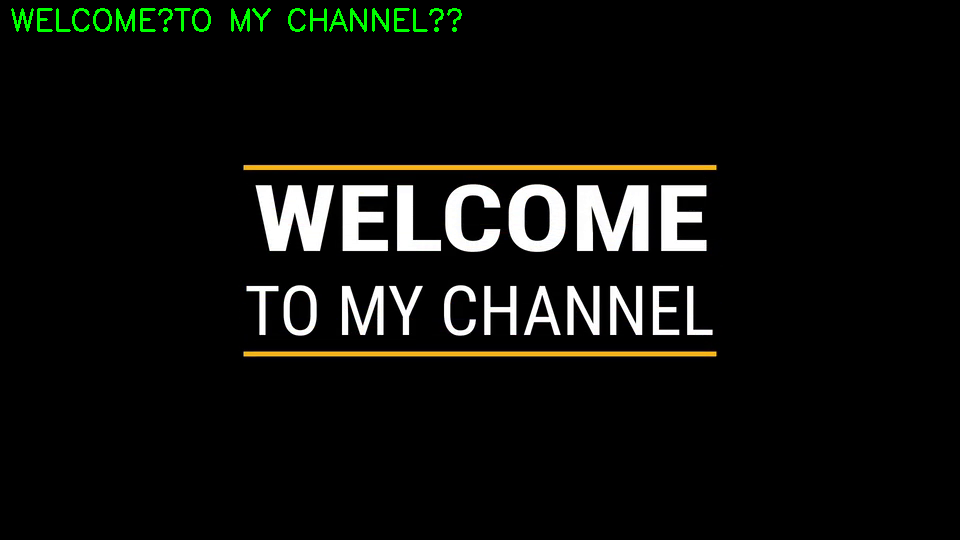

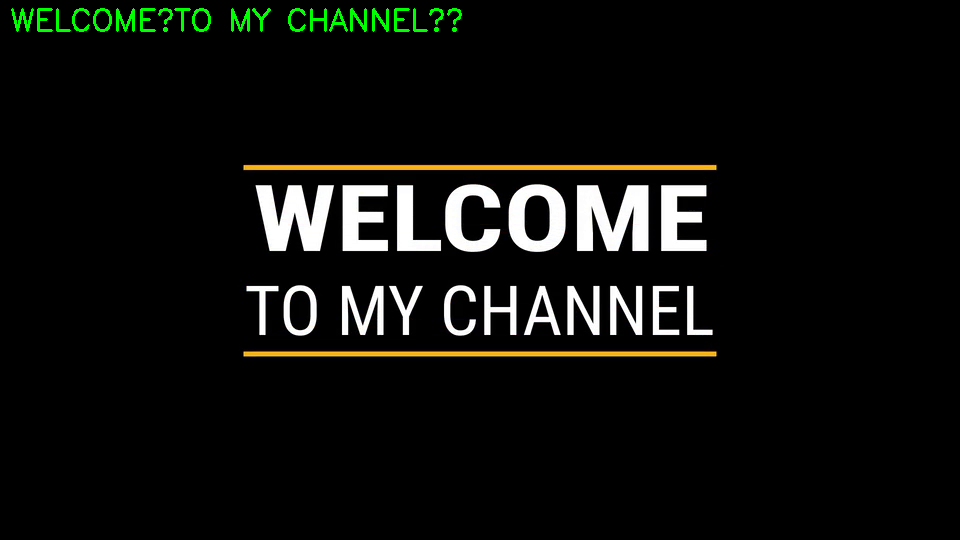

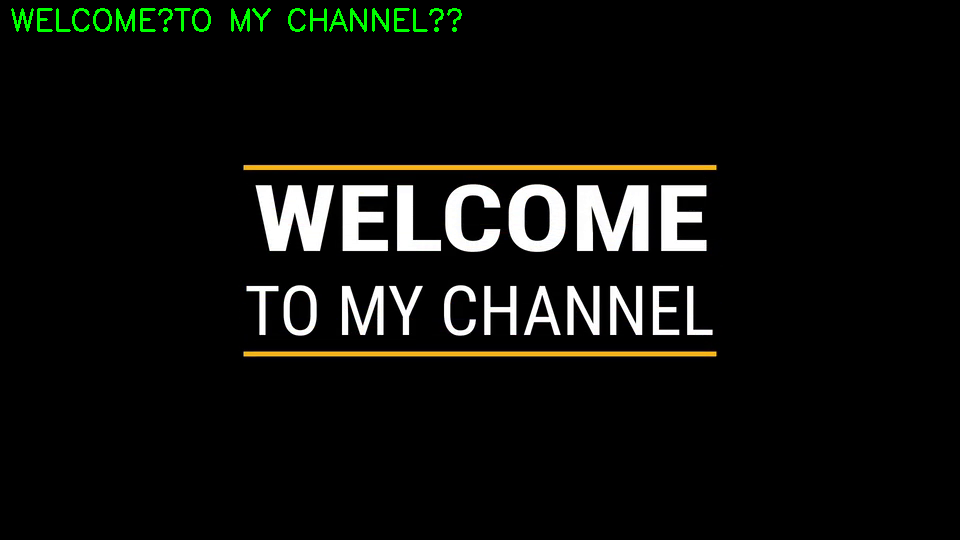

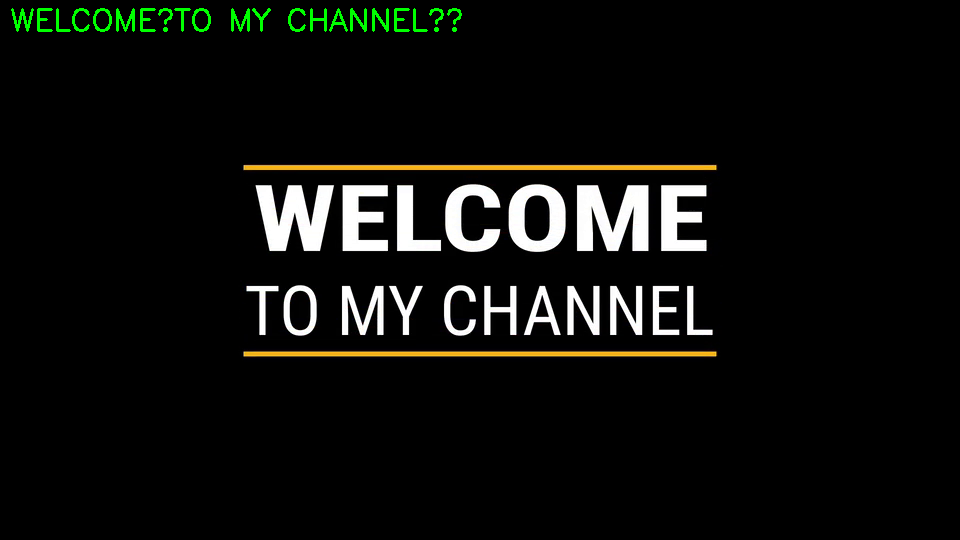

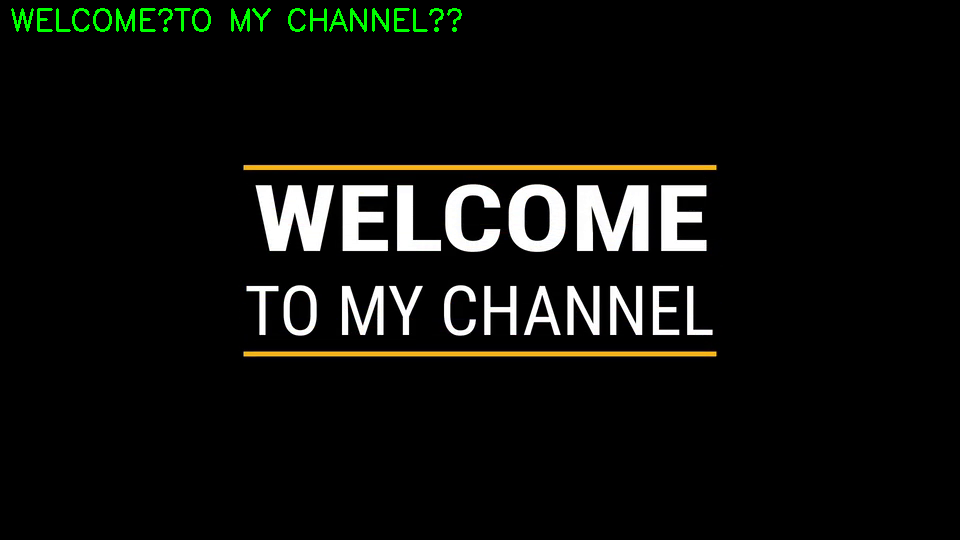

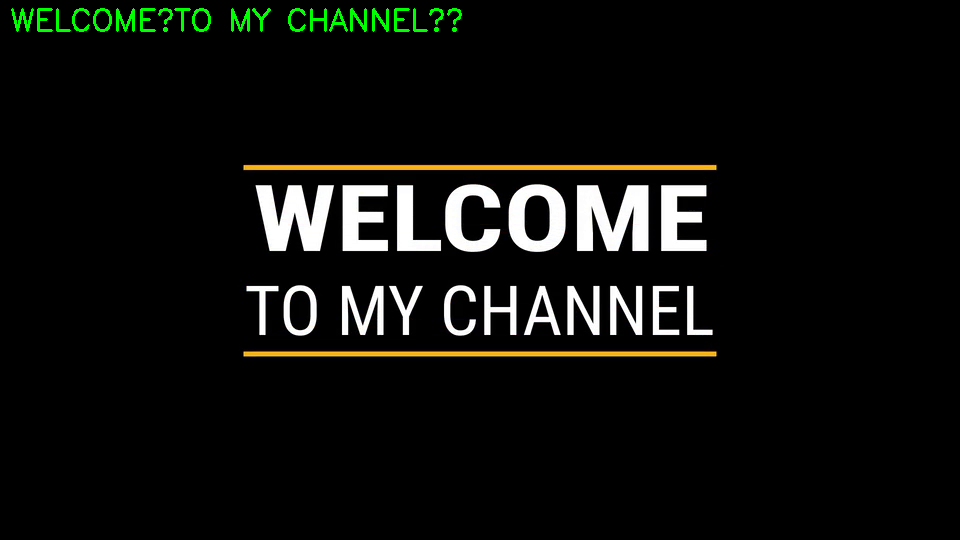

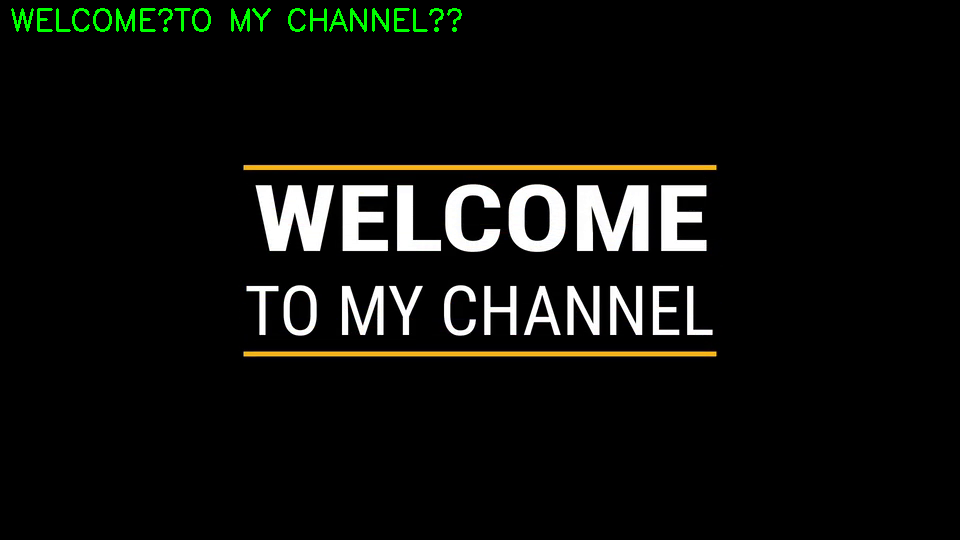

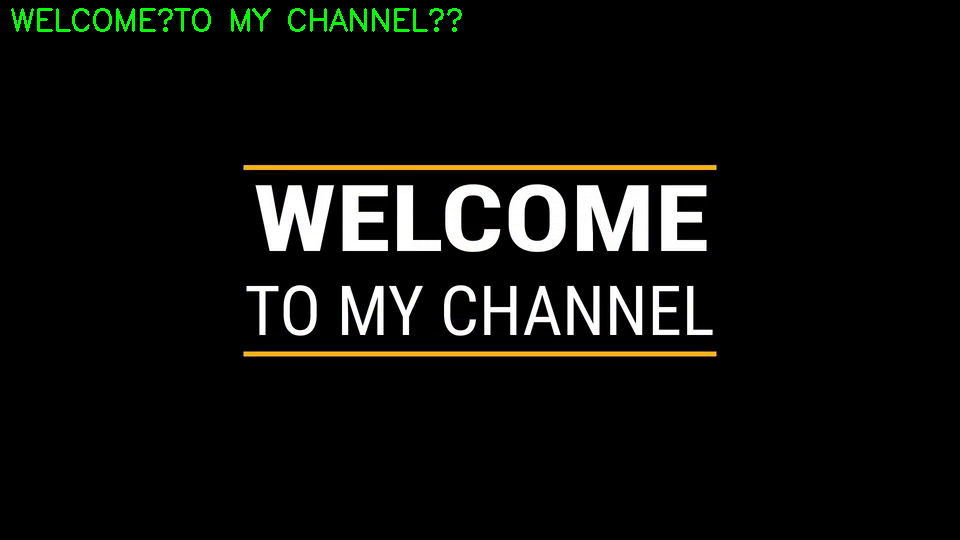

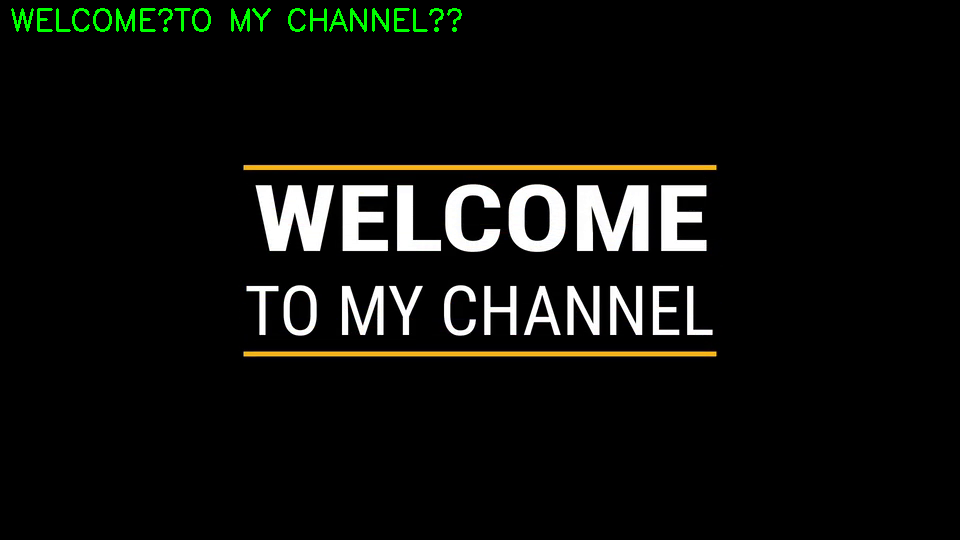

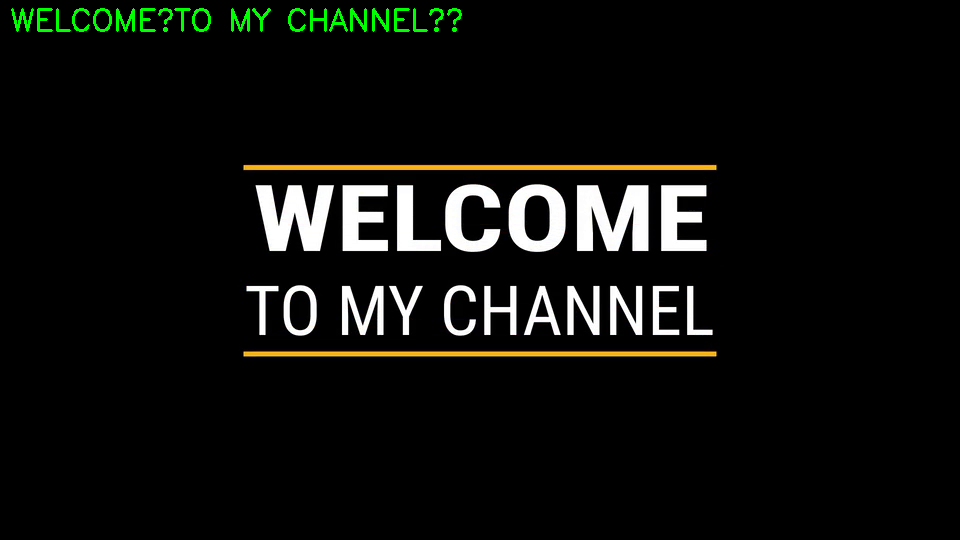

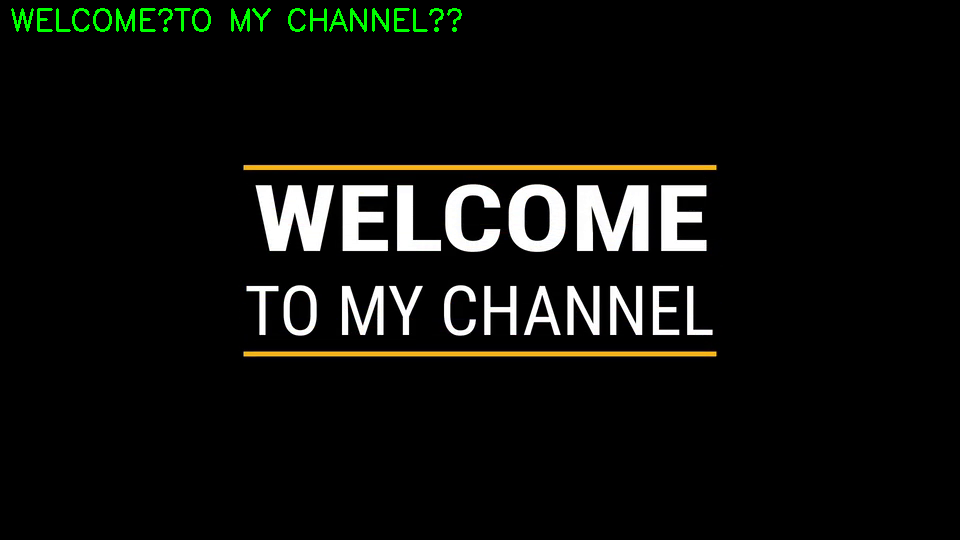

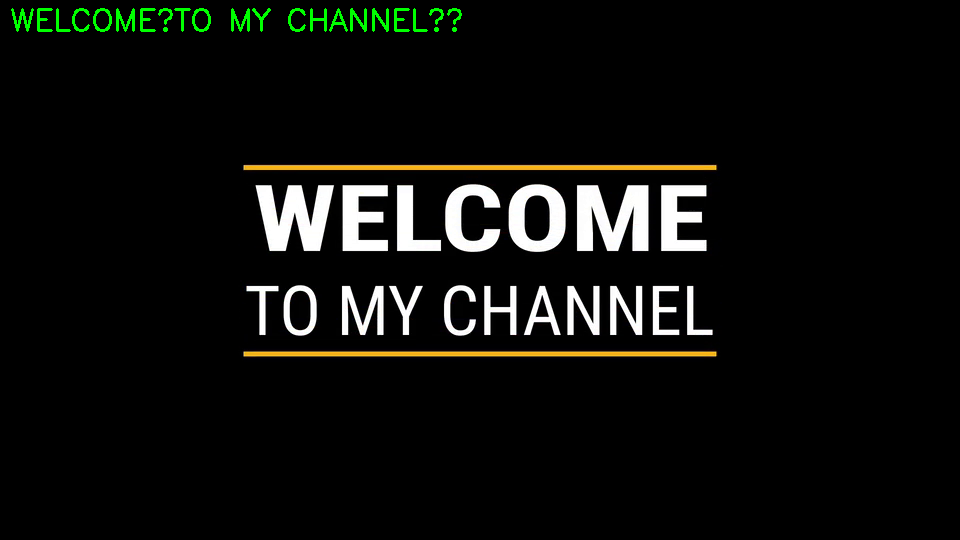

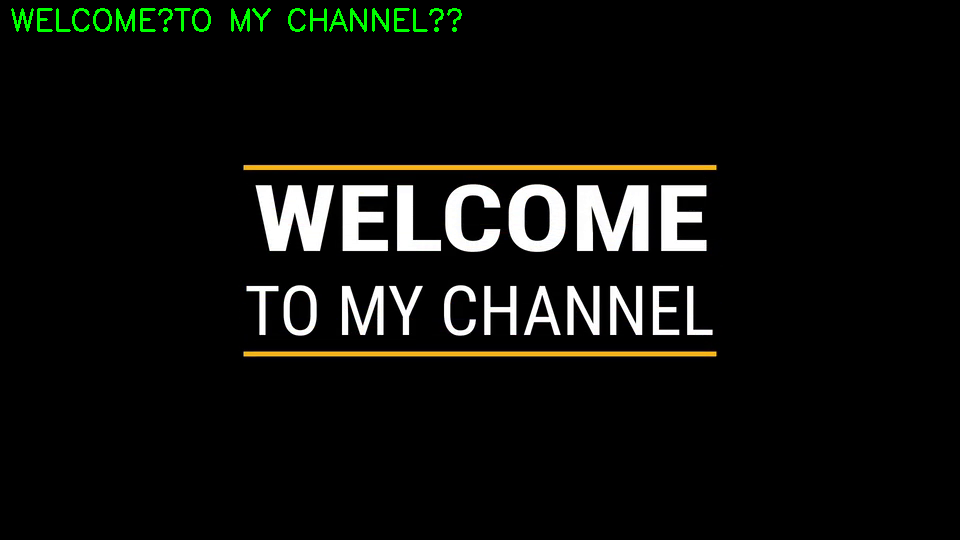

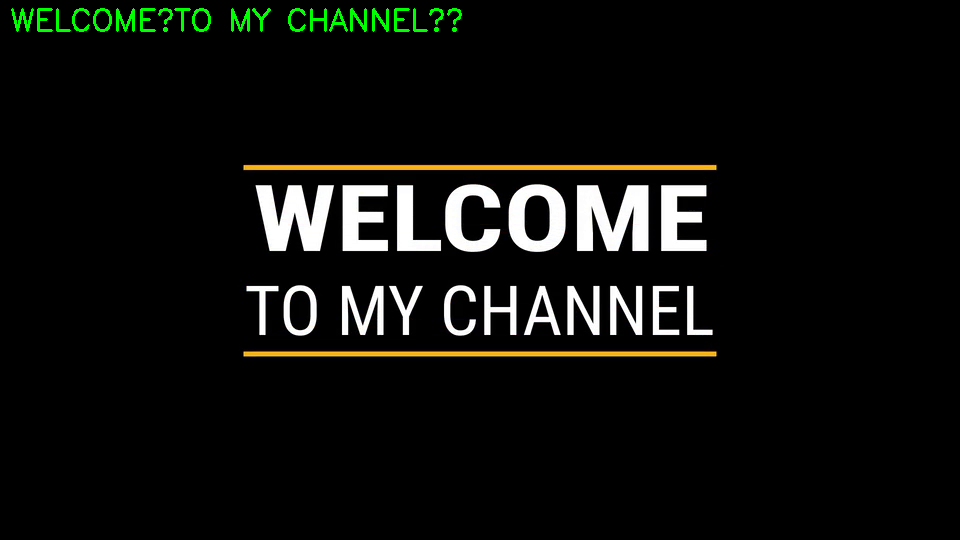

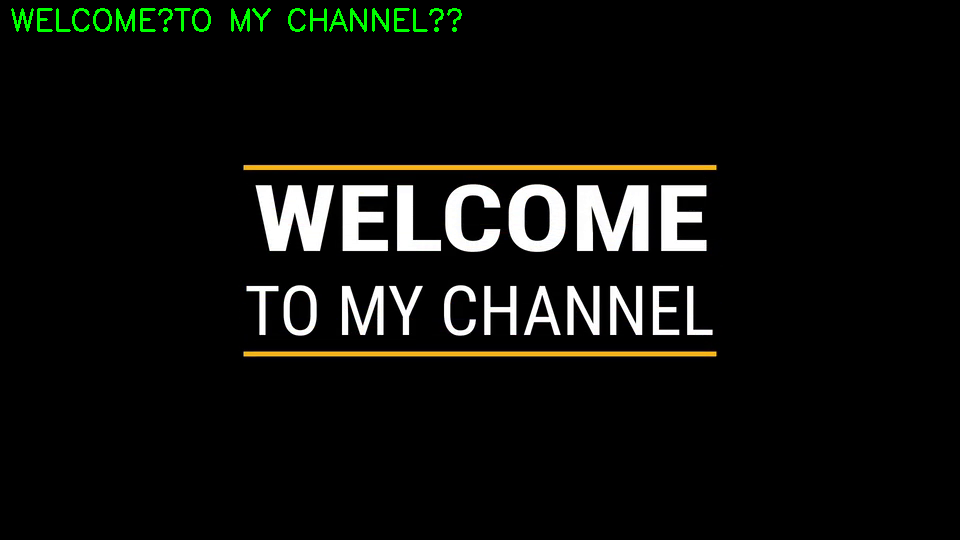

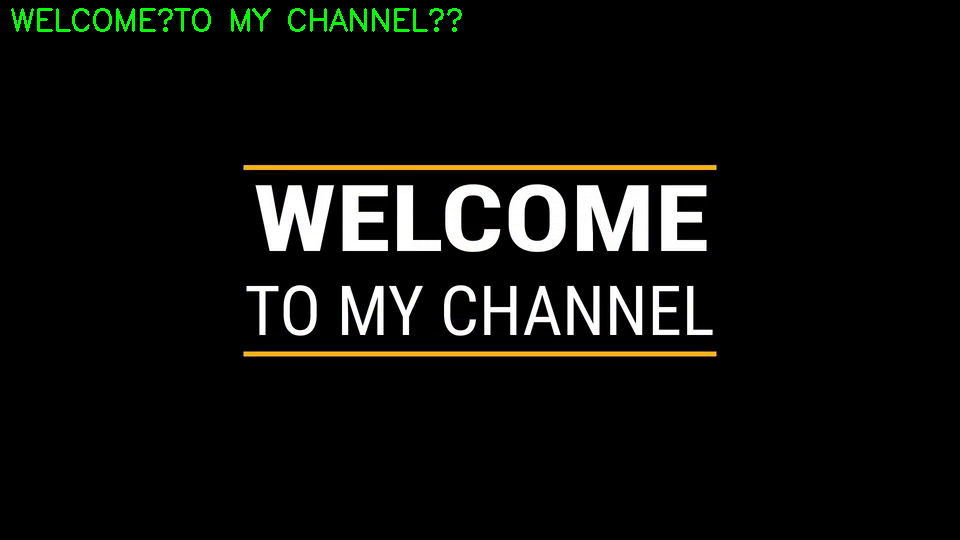

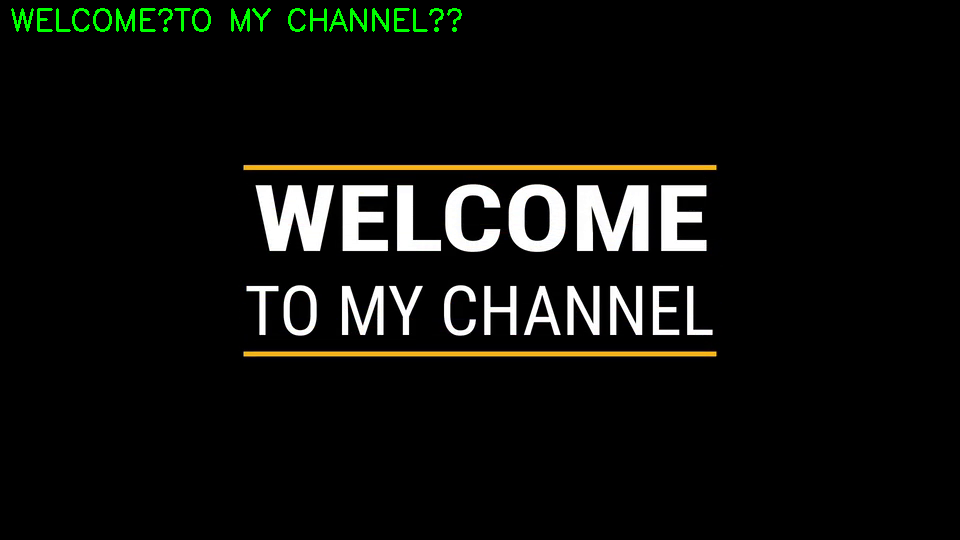

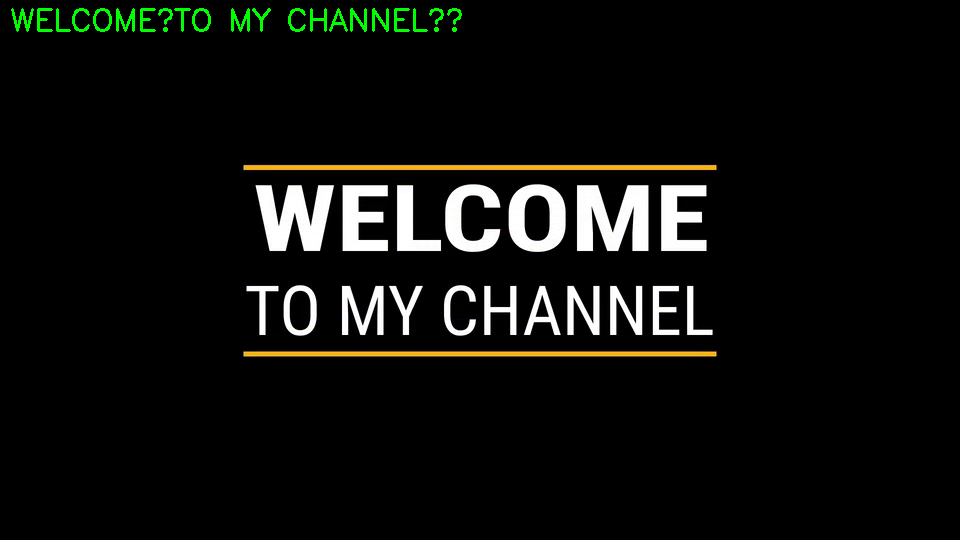

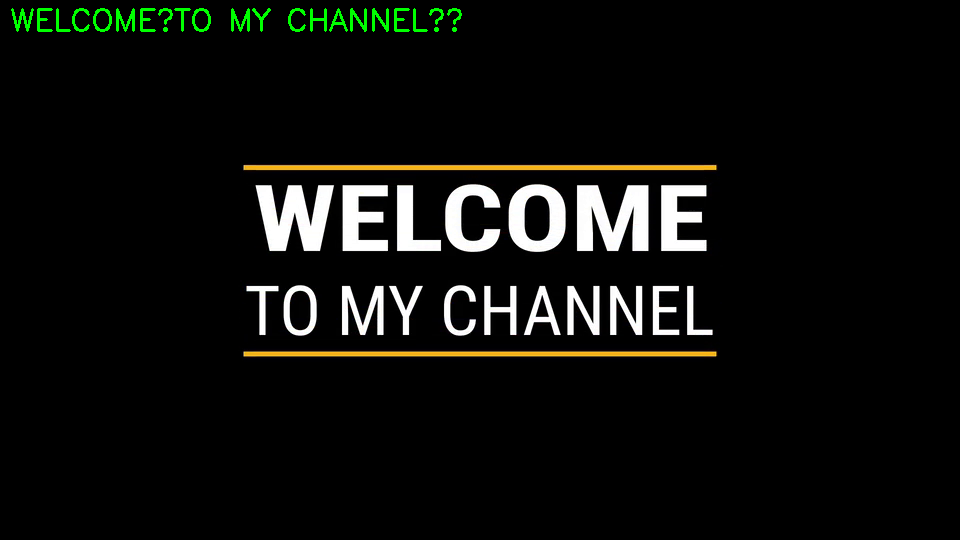

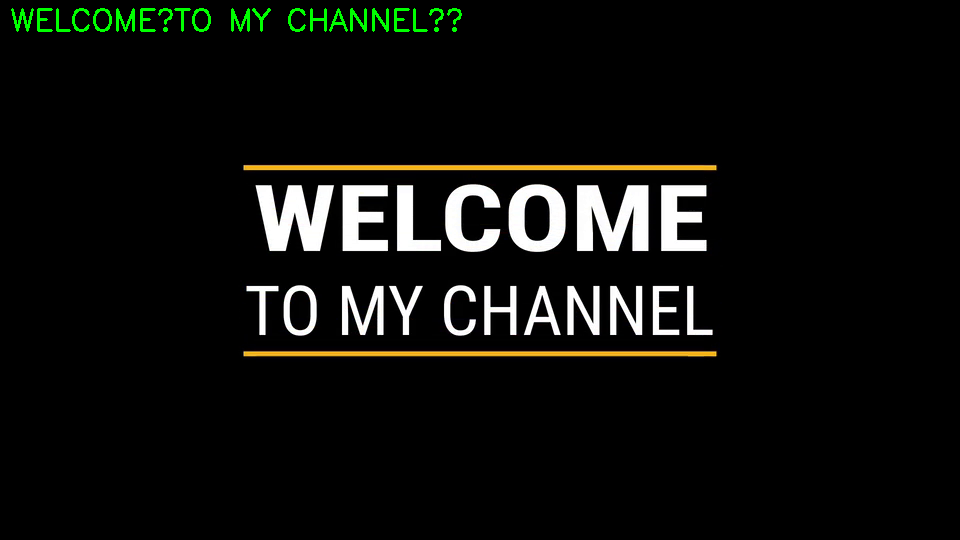

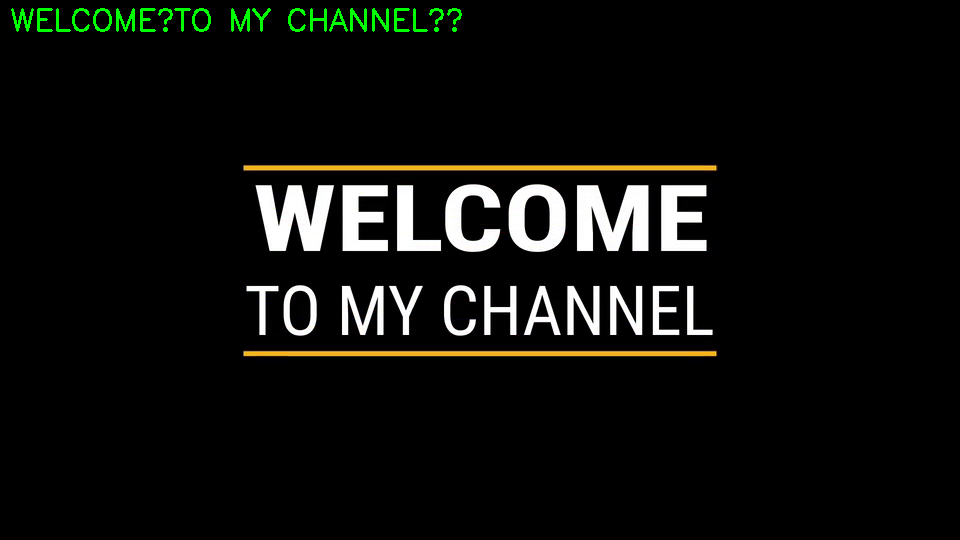

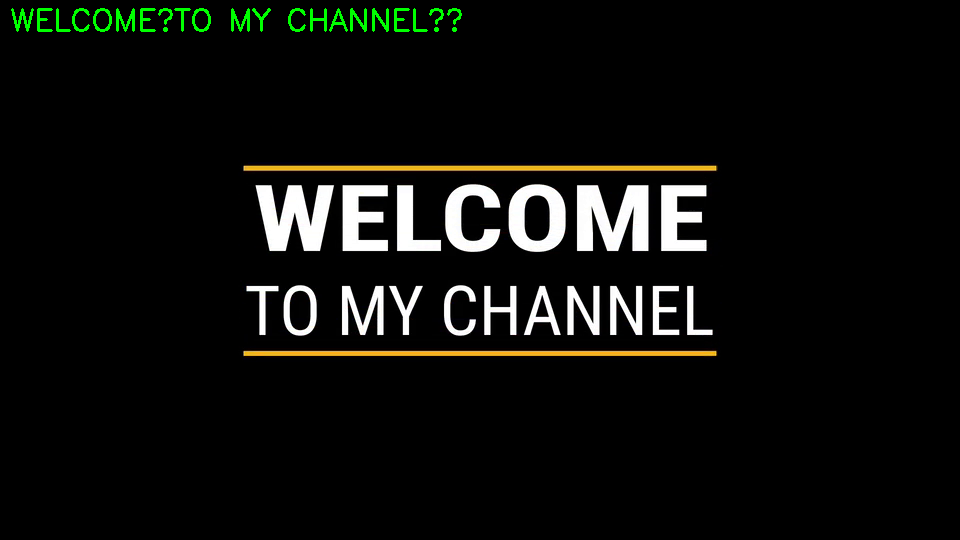

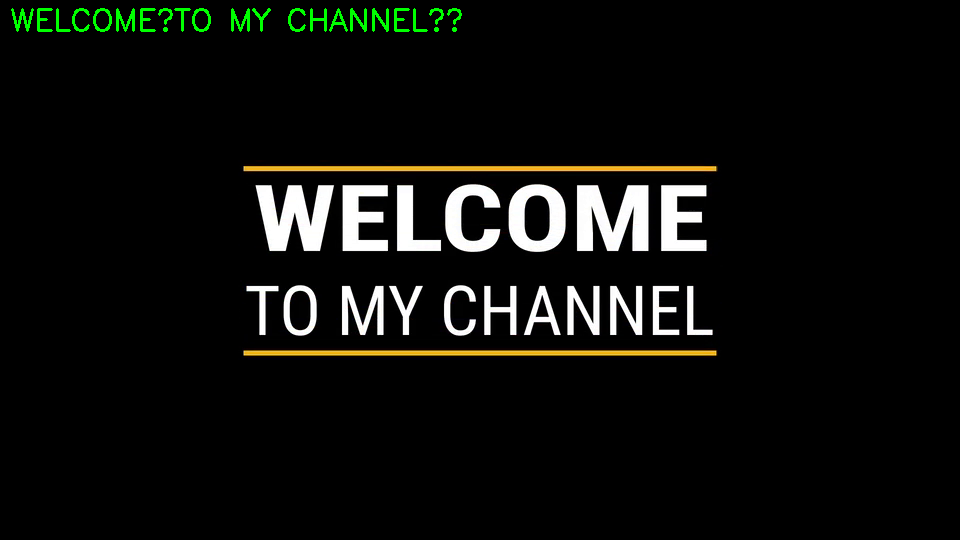

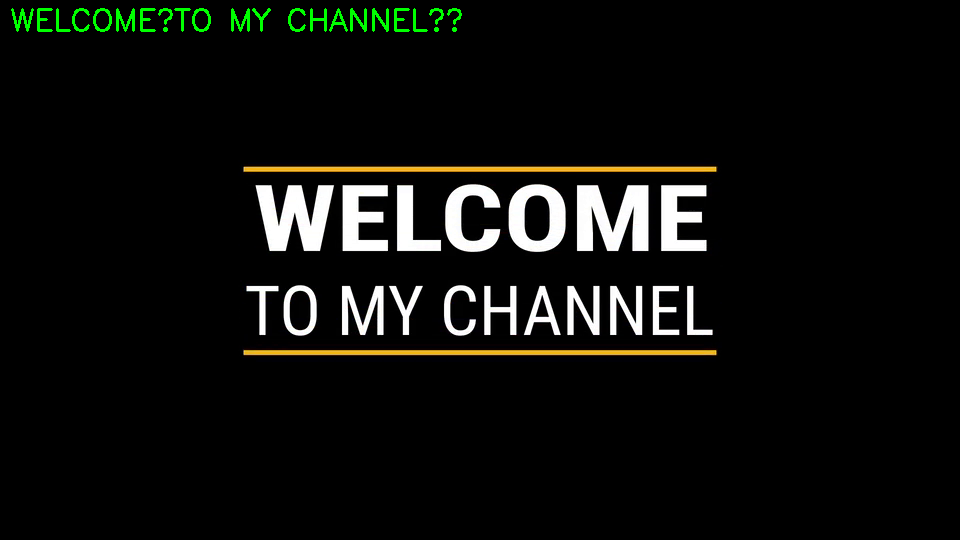

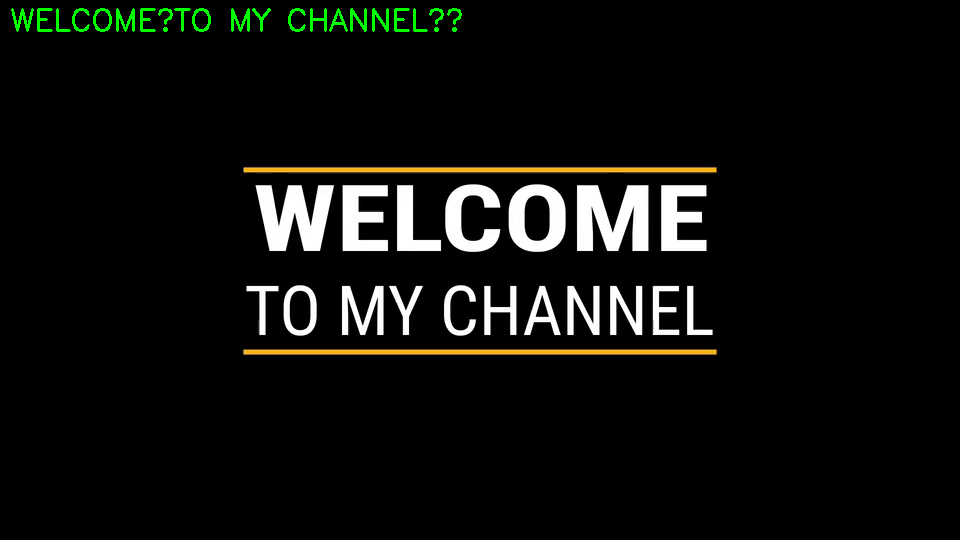

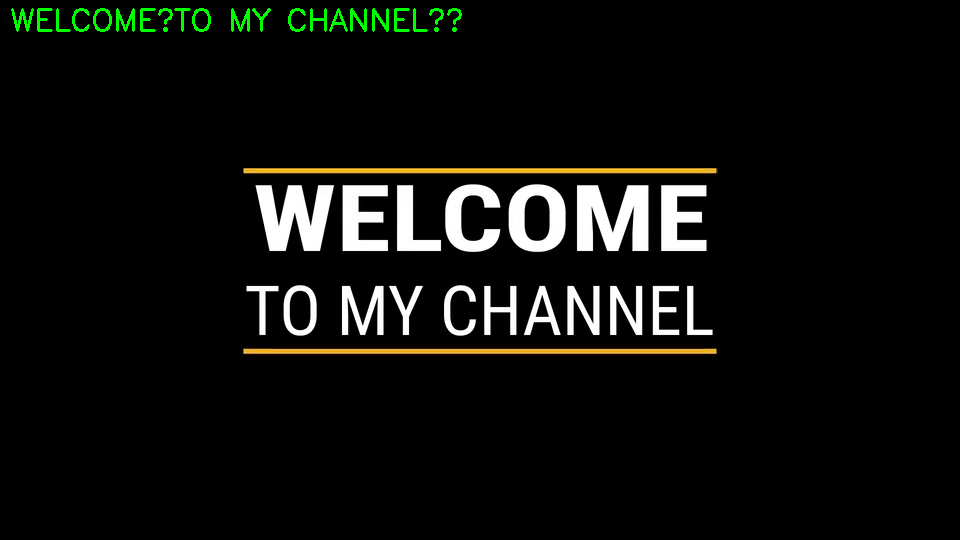

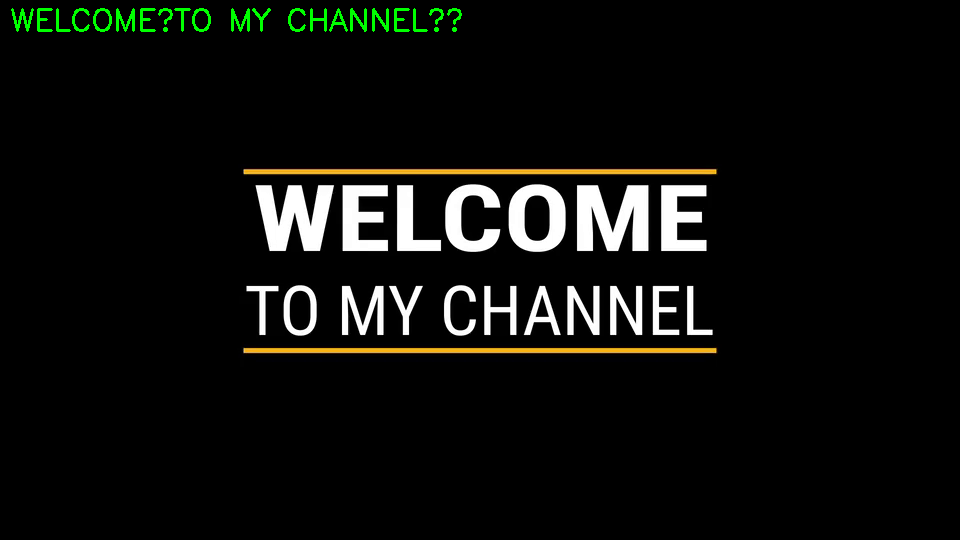

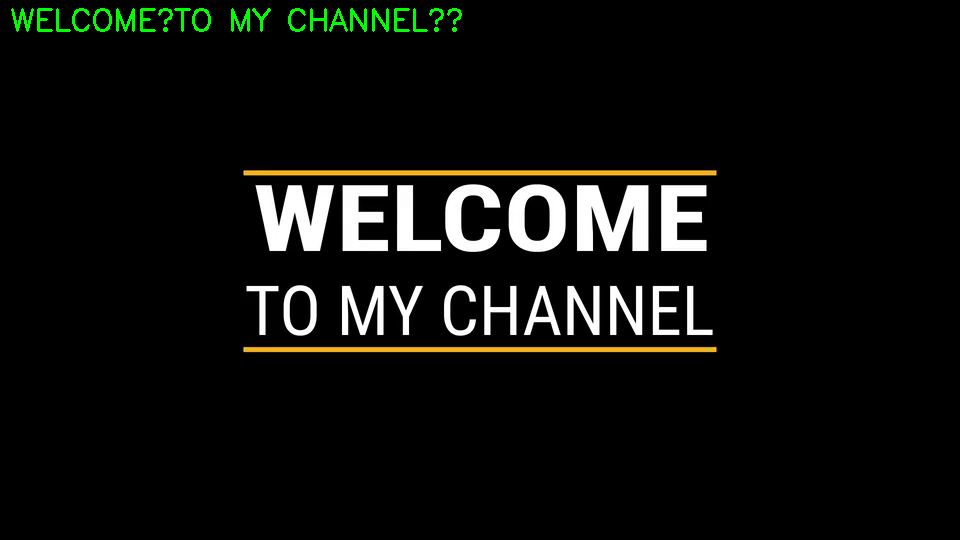

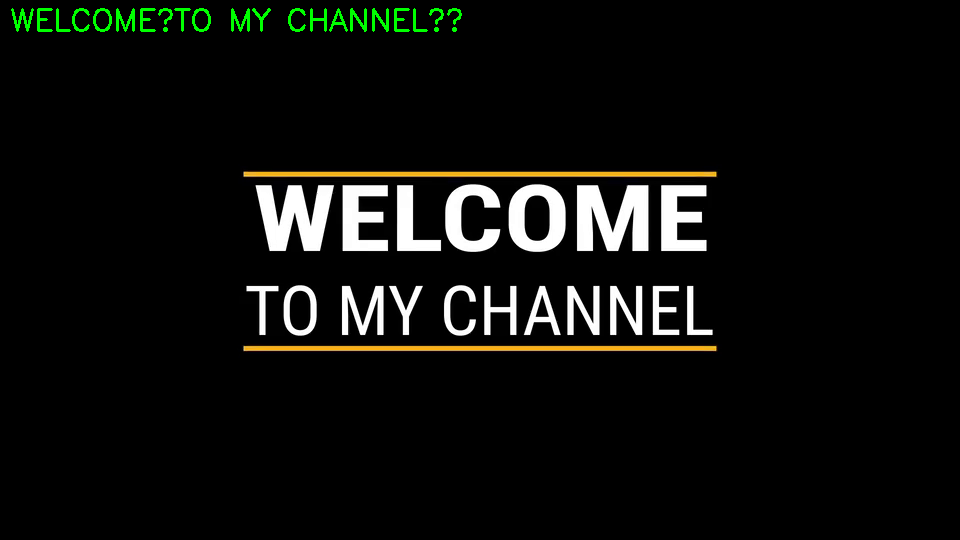

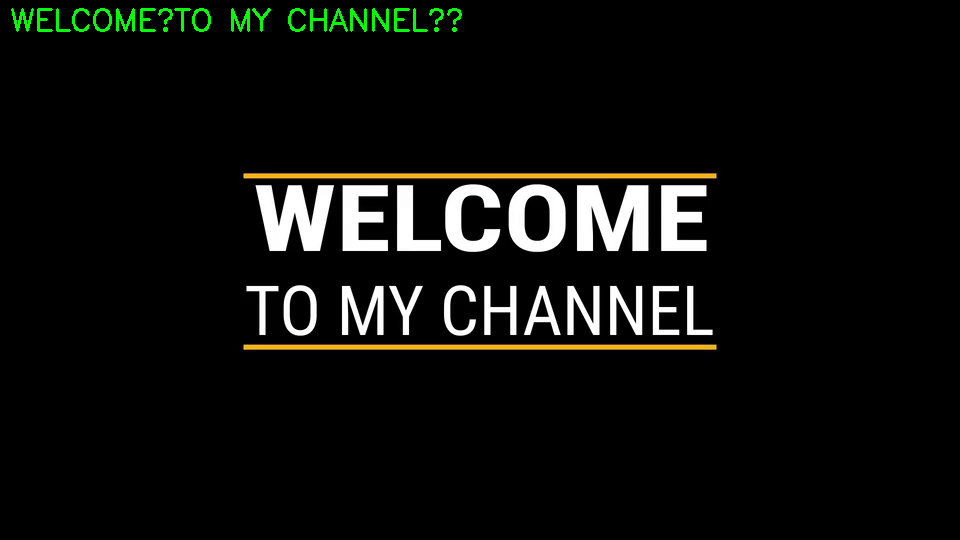

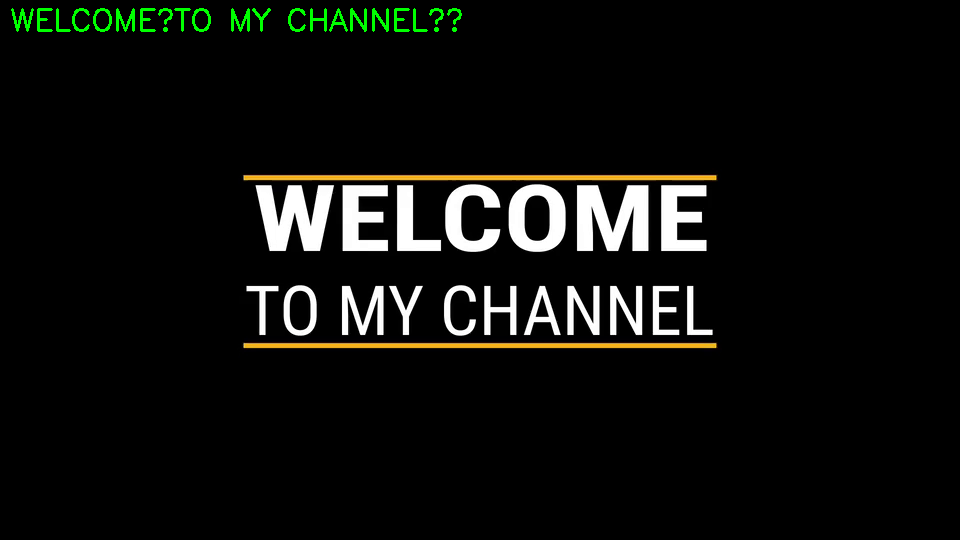

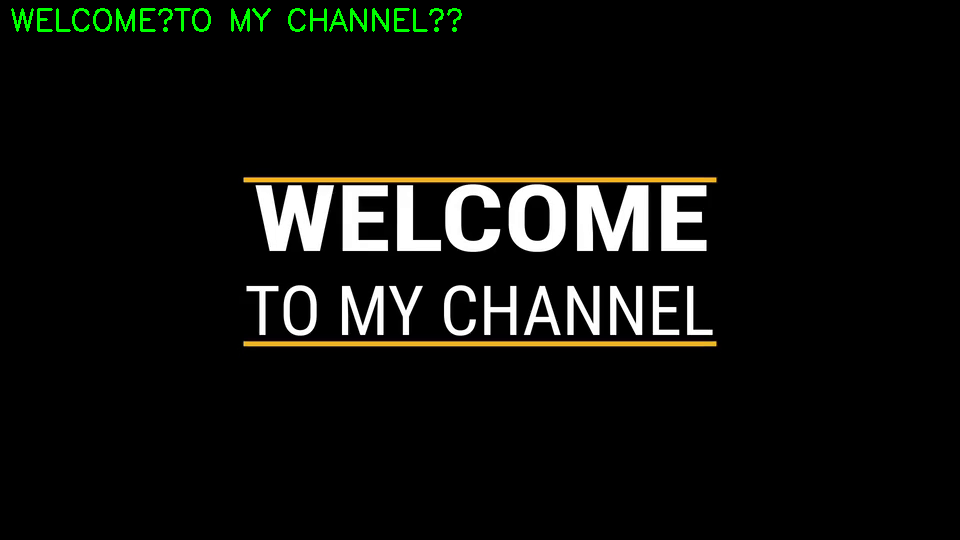

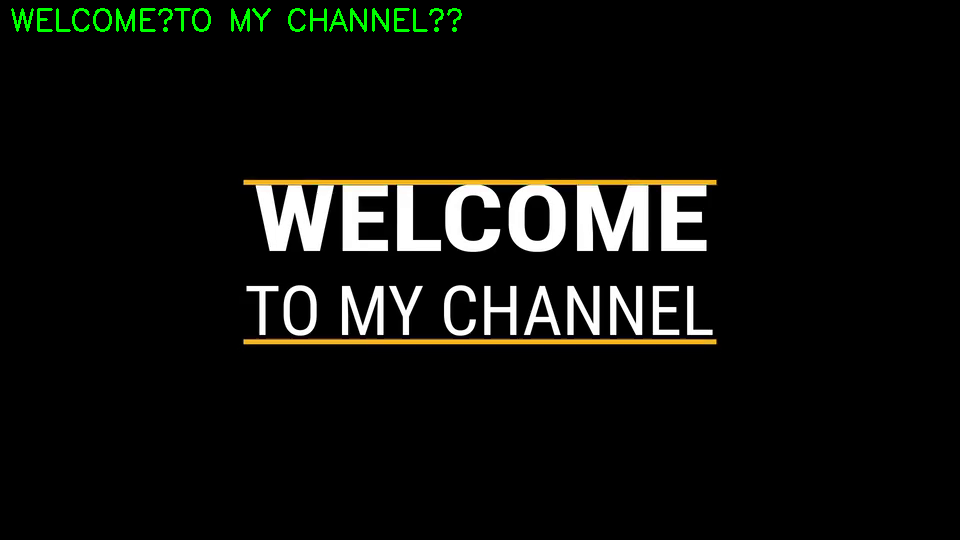

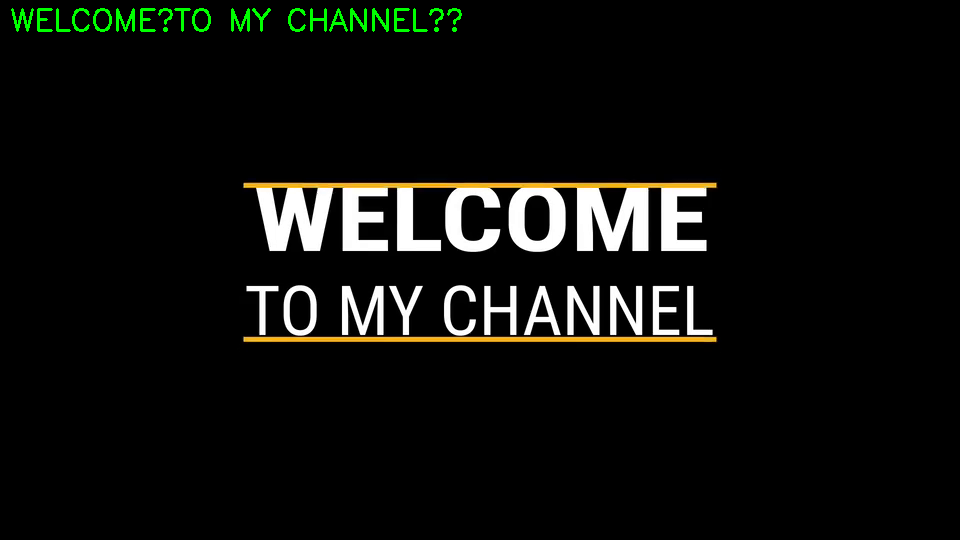

In [71]:
text_recognition_from_video(video_path)